# Analyse du Potentiel EdTech en Afrique Subsaharienne

Ce notebook Jupyter est dédié à l'exploration du potentiel du marché EdTech (technologies éducatives) en Afrique subsaharienne. Notre objectif principal est d'identifier les pays les plus attractifs pour les investissements dans ce secteur, en nous basant sur une analyse approfondie de divers indicateurs éducatifs, économiques et numériques sur la période de 2010 à 2015.

Nous allons construire un *Market Attractiveness Score (MAS)* en évaluant quatre piliers clés :
*   **La taille du marché** : Mesure le nombre d'apprenants potentiels et l'étendue du système éducatif.
*   **La dynamique de croissance** : Évalue la progression de l'achèvement scolaire, l'évolution des effectifs et la croissance de l'accès à internet.

*   **La capacité de paiement** : Estime la solvabilité des pays à travers des indicateurs économiques comme le PIB par habitant et les dépenses publiques en éducation.

*   **La préparation numérique** : Jauge l'adoption des technologies numériques, notamment l'utilisation d'Internet.

Ce travail permettra de déterminer si les données disponibles peuvent éclairer les décisions d'expansion d'Akowé vers de nouveaux pays, en fournissant une analyse soignée, illustrée par des graphiques pertinents et lisibles pour la présentation au board.

## Agenda du Notebook

 **Chargement et Exploration Initiale des Données**

    *   Évaluation de la qualité et structure des jeux de données (`EdStatsData.csv`, `EdStatsCountry.csv`, `EdStatsSeries.csv`).
    *   Identification des valeurs manquantes, doublons et incohérences.
    *   Description et sélection des variables pertinentes.


  **Prétraitement des Données et Ingénierie des Caractéristiques**

    *   Transformation des données (format long).
    *   Filtrage des pays d'Afrique subsaharienne et de la période 2010-2015.
  

 **Sélection des Indicateurs et Calcul du MAS**

    *   Définition des indicateurs clés pour chaque pilier du MAS.
    *   Normalisation des indicateurs et calcul des sous-scores (Scale, Momentum, Ability to Pay, Digital Readiness).

    *   Imputation des valeurs manquantes.
    *   Calcul de nouveaux indicateurs (ex: TAM apprenants connectés, CAGR).
    *   Calcul du MAS final pondéré et ajustement pour la complétude des données.


  **Statistiques Descriptives des Composantes du MAS**

    *   Résumé statistique des scores (moyenne, médiane, écart-type).
    *   Analyse de la dispersion des scores par composante.


 **Visualisations et Analyses**

    *   **Classement MAS TOP 10** : Identification des pays les plus attractifs.
    *   **Heatmap des Sous-scores MAS** : Visualisation de la performance des pays sur les différents piliers.
    *   **Population Jeune vs Connectivité Digitale** : Corrélation entre démographie et accès numérique.


    *   **Histogrammes et Boxplots** : Distribution des indicateurs clés.
    *   **Matrice de Corrélation** : Relations entre les composantes du MAS.
    *   **Les 4 Piliers du MAS pour les Top 5 Pays** : Analyse détaillée des forces et faiblesses des meilleurs performeurs.

 **Restitution et Recommandations**
    *   Synthèse des principaux résultats et interprétation des tendances.
    *   Proposition de pays prioritaires pour l'expansion d'Akowé.
    *   Discussion des limites de l'analyse.

## Table des Matières

1.  [**Chargement et Exploration Initiale des Données**](#scrollTo=mHUtOlm_Cogj)
2.  [**Prétraitement des Données et Ingénierie des Caractéristiques**](#scrollTo=b0YoAtrpSdib)
3.  [**Sélection des Indicateurs et Calcul du MAS**](#scrollTo=wHL30d9dNV9P)
4.  [**Statistiques Descriptives des Composantes du MAS**](#scrollTo=Iob_nqwWKprM)
5.  [**Visualisations et Analyses**](#scrollTo=65ba68a5)


# 1. Chargement et Exploration Initiale des Données

In [98]:
# Import du fichier depuis drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Options d'affichage pour mieux voir les tableaux
pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_columns", 5000)
pd.set_option("display.width", 5000)

# Style de base pour les graphiques
sns.set()

# Petit test pour vérifier que tout est bien importé
print("Imports OK")
print("pandas :", pd.__version__)
print("numpy  :", np.__version__)

Imports OK
pandas : 2.2.2
numpy  : 2.0.2


In [100]:

# Chemin du fichier dans ton Drive
fichier_data ="/content/drive/MyDrive/Edstat/EdStatsData.csv"

# Lecture du fichier
df_data = pd.read_csv(
    fichier_data,
    engine="python",
    on_bad_lines="skip"   # ignore les lignes cassées
)

df_data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Prétraitement des Données


In [101]:
def info_func(dframe):
#nombre de lignes et de colonnes
 n_rows= dframe.shape[0]
 n_col=dframe.shape[1]

#nbre de lignes dupliquees
 n_duplicated=dframe.duplicated().sum()

#les nan
 nan_count=dframe.isna().sum()/dframe.shape[0]
 nan_count=nan_count.sort_values(ascending=True)

#intitules les colonnes
 colonnes= dframe.columns


#messages final
 print(f"le jeu de données contient{n_rows}ligne,{n_col}colonnes,{n_duplicated }ligne duplicatées")
 print(f"Taux de non remplissage : \n{nan_count}valeur vide")


def visualize_nan(df):
  plt.figure(figsize=(10,5))
  sns.heatmap(df.isna(),cbar=False)
  plt.show()

## 2. 1.  Cas du Dataset df_country

In [102]:
fichier_country = "/content/drive/MyDrive/Edstat/EdStatsCountry.csv"

df_country = pd.read_csv(
    fichier_country,
    engine="python",
    on_bad_lines="skip"   # ignore les lignes cassées
)


In [103]:
info_func(df_country)

le jeu de données contient241ligne,32colonnes,0ligne duplicatées
Taux de non remplissage : 
Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
WB-2 code                                            0.004149
2-alpha code                                         0.012448
System of National Accounts                          0.107884
Currency Unit                                        0.107884
Income Group                                         0.112033
Region                                               0.112033
Latest population census                             0.116183
National accounts base year                          0.149378
System of trade                                      0.170124
SNA price valuation                                  0.182573
Latest trade data                       

In [104]:
df_country["Country Code"].nunique()

241

### FILTRAGE  DES PAYS DE LA REGION D AFRIQUE SUB SAHARIENNE

In [105]:
countries_ssa = df_country[df_country["Region"] == "Sub-Saharan Africa"]
countries_ssa.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
14,BDI,Burundi,Burundi,Republic of Burundi,BI,Burundi franc,NaN,Sub-Saharan Africa,Low income,BI,2005,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,General Data Dissemination System (GDDS),2008,"Malaria Indicator Survey (MIS), 2012",Core Welfare Indicator Questionnaire Survey (C...,NaN,NaN,NaN,2012.0,2000,NaN
16,BEN,Benin,Benin,Republic of Benin,BJ,CFA franc,NaN,Sub-Saharan Africa,Low income,BJ,1985,NaN,Value added at producer prices (VAP),IDA,HIPC,Country uses the 1968 System of National Accou...,1992,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2013,"Demographic and Health Survey (DHS), 2011/12",Core Welfare Indicator Questionnaire Survey (C...,NaN,2011/12,NaN,2010.0,2001,NaN
17,BFA,Burkina Faso,Burkina Faso,Burkina Faso,BF,CFA franc,NaN,Sub-Saharan Africa,Low income,BF,1999,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,1992–93,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2006,"Demographic and Health Survey (DHS), 2010",Core Welfare Indicator Questionnaire Survey (C...,NaN,2010,NaN,2011.0,2001,NaN
31,BWA,Botswana,Botswana,Republic of Botswana,BW,Botswana pula,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,BW,2006,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 1988","Expenditure survey/budget survey (ES/BS), 2009/10",NaN,2011. Population and Housing Census.,2010.0,2012.0,2000,NaN


In [106]:
countries_ssa.shape

(48, 32)

In [107]:
codes_ssa = countries_ssa["Country Code"]
codes_ssa.head()

,Country Code
2,AGO
14,BDI
16,BEN
17,BFA
31,BWA


In [108]:
codes_ssa = countries_ssa["Country Code"].unique()
codes_ssa

array(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN', 'GMB',
       'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ', 'MRT',
       'MUS', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'SYC', 'TCD', 'TGO', 'TZA', 'UGA',
       'ZAF', 'ZMB', 'ZWE'], dtype=object)

In [109]:
data_ssa = df_data[df_data["Country Code"].isin(codes_ssa)]
data_ssa.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
109950,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,3.44941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.91510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.121460,5.161690,6.006000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109951,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,3.23021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.14766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.647570,5.888320,6.497300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109952,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,0.87955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.230030,1.328700,1.178390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109953,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,3.67256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.69106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.591410,4.431630,5.513700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109954,Angola,AGO,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.199097,79.690842,81.339439,84.012306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On filtre le DataFrame `df_data` pour ne conserver que les lignes dont le 'Country Code' correspond à un pays d'Afrique subsaharienne, tel que défini dans la liste `codes_ssa`. Le résultat est stocké dans un nouveau DataFrame nommé `data_ssa`, et les premières lignes sont affichées pour un aperçu rapide.

## 2. 1.  Cas du Dataset df_dat

In [110]:
info_func(df_data)

le jeu de données contient886930ligne,70colonnes,0ligne duplicatées
Taux de non remplissage : 
Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.726650
2005              0.792421
2000              0.800801
2012              0.833962
2011              0.835374
2009              0.839775
2006              0.841800
2013              0.844961
2007              0.845228
2008              0.848481
1995              0.851892
2015              0.852234
2003              0.853018
2004              0.854764
1990              0.859735
2002              0.859961
2001              0.860745
1999              0.866011
2014              0.871705
1985              0.898193
1980              0.899516
1975              0.901564
1998              0.904261
1994              0.912663
1996              0.913401
1993              0.914545
1992              0.914826
1991              0.916073
1997              0.917183
1970          

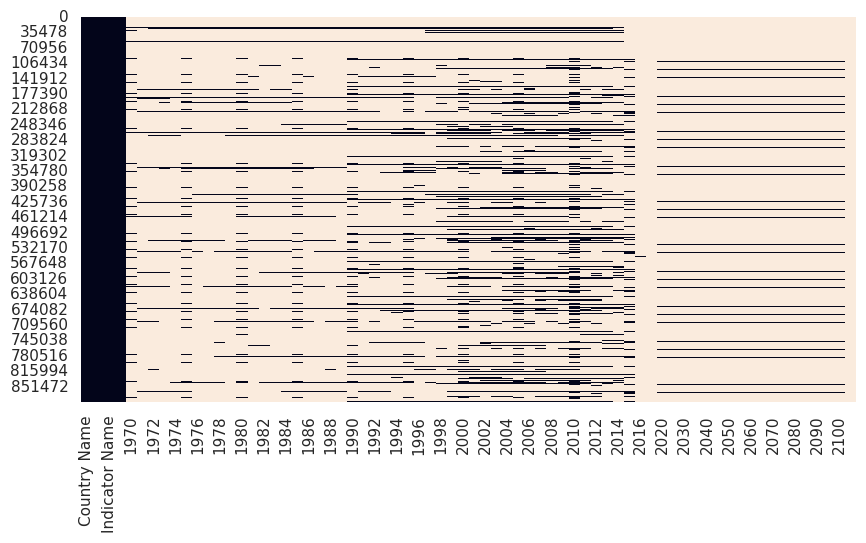

In [212]:
visualize_nan(df_data)

In [111]:
print(df_data["Country Code"].unique())
print(df_data["Country Code"].nunique())

['ARB' 'EAS' 'EAP' 'EMU' 'ECS' 'ECA' 'EUU' 'HPC' 'HIC' 'LCN' 'LAC' 'LDC'
 'LMY' 'LIC' 'LMC' 'MEA' 'MNA' 'MIC' 'NAC' 'OED' 'SAS' 'SSF' 'SSA' 'UMC'
 'WLD' 'AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS'
 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN'
 'BOL' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR'
 'CAN' 'CYM' 'CAF' 'TCD' 'CHI' 'CHL' 'CHN' 'COL' 'COM' 'COD' 'COG' 'CRI'
 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY'
 'SLV' 'GNQ' 'ERI' 'EST' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB' 'GMB'
 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY'
 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR'
 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'PRK' 'KOR' 'XKX' 'KWT' 'KGZ'
 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MKD' 'MDG'
 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO'
 'MNG' 'MNE' 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'N

In [112]:
data_ssa.shape


(175920, 70)

In [113]:
year_cols = [col for col in data_ssa.columns if str(col).isdigit()]

print("Nombre de colonnes année :", len(year_cols))
print("Quelques années au début :", year_cols[:5])
print("Quelques années à la fin :", year_cols[-5:])

Nombre de colonnes année : 65
Quelques années au début : ['1970', '1971', '1972', '1973', '1974']
Quelques années à la fin : ['2080', '2085', '2090', '2095', '2100']


Identification des colonnes qui représentent des années dans le DataFrame `data_ssa`. Il parcourt toutes les colonnes, convertit leur nom en chaîne de caractères, et sélectionne celles qui sont purement numériques. Ensuite, il affiche le nombre total de ces colonnes "année" et les cinq premières et cinq dernières pour donner un aperçu de la plage chronologique couverte par les données.

In [114]:
#  Passage au format long avec pandas.melt
id_vars = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]

df_long = data_ssa.melt(
    id_vars=id_vars,
    value_vars=year_cols,
    var_name="Year",
    value_name="Value"
)

In [115]:
df_long["Year"] = df_long["Year"].astype(int)
df_long["Value"] = pd.to_numeric(df_long["Value"], errors="coerce")

print("Taille de df_long :", df_long.shape)
df_long.head()

Taille de df_long : (11434800, 6)


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,1970,NaN
1,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,1970,NaN
2,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,1970,NaN
3,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,1970,NaN
4,Angola,AGO,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1970,NaN


In [116]:
code_country = [
    # Afrique de l’Ouest
    "BEN", "BFA", "CPV", "CIV", "GMB", "GHA", "GIN", "GNB",
    "LBR", "MLI", "NER", "NGA", "SEN", "SLE", "TGO",

    # Afrique centrale
    "AGO", "CMR", "CAF", "TCD", "COG", "COD", "GNQ", "GAB", "STP",

    # Afrique de l’Est
    "BDI", "COM", "DJI", "ERI", "ETH", "KEN", "MDG", "MWI", "MUS",
    "MOZ", "RWA", "SYC", "SOM", "SSD", "TZA", "UGA", "ZMB", "ZWE",

    # Afrique australe
    "BWA", "LSO", "NAM", "ZAF", "SWZ"
]


In [117]:
unique_matching_codes = df_long[df_long['Country Code'].isin(code_country)]['Country Code'].unique()
print(unique_matching_codes)

['AGO' 'BEN' 'BWA' 'BFA' 'BDI' 'CPV' 'CMR' 'CAF' 'TCD' 'COM' 'COD' 'COG'
 'CIV' 'GNQ' 'ERI' 'ETH' 'GAB' 'GMB' 'GHA' 'GIN' 'GNB' 'KEN' 'LSO' 'LBR'
 'MDG' 'MWI' 'MLI' 'MUS' 'MOZ' 'NAM' 'NER' 'NGA' 'RWA' 'STP' 'SEN' 'SYC'
 'SLE' 'SOM' 'ZAF' 'SSD' 'SWZ' 'TZA' 'TGO' 'UGA' 'ZMB' 'ZWE']


 filtre sur DataFrame `df_long` pour identifier et afficher uniquement les codes pays uniques qui figurent dans la liste prédéfinie `code_country`. Cela permet de confirmer que les codes des pays d'Afrique subsaharienne que nous avons définis sont bien présents dans le DataFrame principal et sont prêts pour une analyse plus approfondie.

In [118]:
unique_matching_codes.shape

(46,)

In [119]:
codes_in_df_long = df_long['Country Code'].isin(code_country).any()
print(codes_in_df_long)

True


In [120]:
fichier_series = "/content/drive/MyDrive/Edstat/EdStatsSeries.csv"

df_series = pd.read_csv(
    fichier_series,
    engine="python",
    on_bad_lines="skip"   # ignore les lignes cassées
)


## 2.3. Cas du Dataset df_country

In [121]:
info_func(df_series)

le jeu de données contient3665ligne,21colonnes,0ligne duplicatées
Taux de non remplissage : 
Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Long definition                        0.000000
Source                                 0.000000
Short definition                       0.411733
Other notes                            0.849386
Base Period                            0.914325
Related source links                   0.941337
Periodicity                            0.972988
Aggregation method                     0.987176
Statistical concept and methodology    0.993724
Limitations and exceptions             0.996180
General comments                       0.996180
Development relevance                  0.999181
Unit of measure                        1.000000
Notes from original source             1.000000
Other web links                        1.000000
Related indicators                     1.00

In [122]:
df_series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20'], dtype='object')

In [123]:
df_long.head()
#afficher les 5 premieres ligne du dataframe df_long

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,1970,NaN
1,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,1970,NaN
2,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,1970,NaN
3,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,1970,NaN
4,Angola,AGO,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1970,NaN


In [124]:
print(df_series['Topic'].head())
#afficher les 5 premieres lignes de la colonnes Topic

0    Attainment
1    Attainment
2    Attainment
3    Attainment
4    Attainment
Name: Topic, dtype: object


In [125]:
df_country.columns
#AFFICHAGE DES  COLONNES DE df_country

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Unnamed: 31'], dtype='object')

In [126]:
df_merged = pd.merge(
    df_long,
    df_series[['Series Code','Topic']],
    left_on='Indicator Code',
    right_on='Series Code',
    how='inner'
)

# fusionn de df_merged avec df_country pour ajouter 'Income Group'
df_merged = pd.merge(
    df_merged,
    df_country[['Country Code', 'Income Group']],
    on='Country Code',
    how='left'
)

print("Shape of the merged DataFrame:", df_merged.shape)
df_merged.head()

Shape of the merged DataFrame: (11269440, 9)


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value,Series Code,Topic,Income Group
0,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,1970,NaN,UIS.NERA.2,Secondary,Upper middle income
1,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,1970,NaN,UIS.NERA.2.F,Secondary,Upper middle income
2,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,1970,NaN,UIS.NERA.2.GPI,Secondary,Upper middle income
3,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,1970,NaN,UIS.NERA.2.M,Secondary,Upper middle income
4,Angola,AGO,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1970,NaN,SE.PRM.TENR,Primary,Upper middle income


In [127]:
df_merged = df_merged.drop(columns=['Indicator Code'])
print("Taille de df_merged après suppression de 'Series Code':", df_merged.shape)
display(df_merged.head())

#suppression de la colonne Indicator Code

Taille de df_merged après suppression de 'Series Code': (11269440, 8)


,Country Name,Country Code,Indicator Name,Year,Value,Series Code,Topic,Income Group
0,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",1970,NaN,UIS.NERA.2,Secondary,Upper middle income
1,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",1970,NaN,UIS.NERA.2.F,Secondary,Upper middle income
2,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",1970,NaN,UIS.NERA.2.GPI,Secondary,Upper middle income
3,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",1970,NaN,UIS.NERA.2.M,Secondary,Upper middle income
4,Angola,AGO,"Adjusted net enrolment rate, primary, both sex...",1970,NaN,SE.PRM.TENR,Primary,Upper middle income


### FILTRAGE  DES PAYS D AFRIQUE SUB SAHARIENNE SUR L ANNEE 2010 - 2015

In [128]:
df_Ed = df_merged[(df_merged['Year'] >= 2010) & (df_merged['Year'] <= 2015)]

print("Taille du DataFrame après filtrage par années:", df_Ed.shape)
display(df_Ed.head())

Taille du DataFrame après filtrage par années: (1040256, 8)


,Country Name,Country Code,Indicator Name,Year,Value,Series Code,Topic,Income Group
6935040,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",2010,6.006000,UIS.NERA.2,Secondary,Upper middle income
6935041,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",2010,6.497300,UIS.NERA.2.F,Secondary,Upper middle income
6935042,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",2010,1.178390,UIS.NERA.2.GPI,Secondary,Upper middle income
6935043,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",2010,5.513700,UIS.NERA.2.M,Secondary,Upper middle income
6935044,Angola,AGO,"Adjusted net enrolment rate, primary, both sex...",2010,81.339439,SE.PRM.TENR,Primary,Upper middle income


In [129]:
print(df_Ed['Country Code'].unique())

['AGO' 'BEN' 'BWA' 'BFA' 'BDI' 'CPV' 'CMR' 'CAF' 'TCD' 'COM' 'COD' 'COG'
 'CIV' 'GNQ' 'ERI' 'ETH' 'GAB' 'GMB' 'GHA' 'GIN' 'GNB' 'KEN' 'LSO' 'LBR'
 'MDG' 'MWI' 'MLI' 'MRT' 'MUS' 'MOZ' 'NAM' 'NER' 'NGA' 'RWA' 'STP' 'SEN'
 'SYC' 'SLE' 'SOM' 'ZAF' 'SSD' 'SDN' 'SWZ' 'TZA' 'TGO' 'UGA' 'ZMB' 'ZWE']


In [130]:
print(df_Ed['Country Code'].nunique())

48


# **3. CHOIX DES INDICATEURS**





In [131]:
indicateurs_select = []

On initialise une liste vide nommée `indicateurs_select`. Cette liste sera ensuite remplie avec les codes d'indicateurs pertinents sélectionnés pour l'analyse, en fonction des différents piliers du Market Attractiveness Score (MAS). C'est une étape préparatoire pour centraliser tous les indicateurs choisis.

# 3.1-  Scale Score — Taille du marché (35 %)


### Population 15–24 ans

SP.POP.1524.TO.UN : population totale de la tranche 15-24 ans


### Taux brut de scolarisation(secondaire/tertiaire)

SE.TER.ENRR : Taux brut de scolarisation dans l'enseignement supérieur, les deux sexes (%)

SE.SEC.ENRR : Taux brut de scolarisation, deuxième cycle du secondaire, les deux sexes (%)

### Effectifs scolaires

SE.SEC.ENRL: (Secondary school enrollment, total)

SE.TER.ENRL (Tertiary school enrollment, total)

### TAM apprenants connectés

SP.POP.1524.TO.UN * IT.NET.USER.P2

In [132]:
indicateurs_scale = ["SP.POP.1524.TO.UN","SE.TER.ENRR", "SE.SEC.ENRR"]

## **3.2. Momentum Score — Dynamique de croissance (25 %)**

Progression du taux d’achèvement du secondaire: SE.SEC.CMPT.LO.ZS

Croissance effectif secondaire/tertiaire : SE.SEC.ENRL , SE.TER.ENRL

CAGR accès Internet → IT.NET.USER.P2 (sur 5–10 ans)


In [133]:
indicateurs_momentum = ["SE.SEC.CMPT.LO.ZS","SE.SEC.ENRL","SE.TER.ENRL","IT.NET.USER.P2"]

## **3.3. Ability to Pay Score — Capacité de paiement (25 %)**

Dans ce bloc, on prépare l’indicateur de « dépenses publiques d’éducation » pour la capacité de paiement. On utilise le dictionnaire des séries df_series et on filtre les lignes dont le Indicator Name contient l’expression « government expenditure on education ». On affiche ensuite pour ces séries le code (Series Code), le nom complet de l’indicateur et le thème (Topic). Cette étape sert simplement à identifier de façon factuelle quelles séries peuvent être utilisées pour mesurer l’effort budgétaire des États en faveur de l’éducation.

In [134]:

def indicators_keyword(df, column_name, keyword):
    mask = df[column_name].str.contains(keyword, case=False, na=False)
    return df.loc[mask, ["Series Code", "Indicator Name", "Topic"]]

In [135]:
keywords_to_search = ["government expenditure on education"]

for keyword in keywords_to_search:
    print(f"\nIndicateurs candidats pour '{keyword}' :")
    indicator_candidates = indicators_keyword(df_series, "Indicator Name", keyword)
    print(indicator_candidates)


Indicateurs candidats pour 'government expenditure on education' :
            Series Code                                     Indicator Name         Topic
2375     SE.XPD.PRIM.ZS  Expenditure on primary as % of government expe...  Expenditures
2377     SE.XPD.SECO.ZS  Expenditure on secondary as % of government ex...  Expenditures
2379     SE.XPD.TERT.ZS  Expenditure on tertiary as % of government exp...  Expenditures
2381  SE.XPD.TOTL.GD.ZS  Government expenditure on education as % of GD...  Expenditures
3599        UIS.XPubP.0  Expenditure on pre-primary as % of government ...  Expenditures
3600        UIS.XPUBP.2  Expenditure on lower secondary as % of governm...  Expenditures
3601    UIS.XPUBP.2T4.V  Expenditure on secondary and post-secondary no...  Expenditures
3602        UIS.XPUBP.3  Expenditure on upper secondary as % of governm...  Expenditures
3603        UIS.XPubP.4  Expenditure on post-secondary non-tertiary as ...  Expenditures
3604       UIS.XPUBP.UK  Expenditure on ed

In [136]:
revenu = ["SE.XPD.TOTL.GD.ZS"]

PIB par habitant en dollars courants → NY.GDP.PCAP.CD

RNB par habitant en dollars courants → NY.GNP.PCAP.CD

Dépenses publiques d’éducation (% PIB) → SE.XPD.TOTL.GD.ZS

Dépenses publiques d’éducation (% budget) → SE.XPD.TOTL.GB.ZS

In [137]:
indicateurs_pib = ["NY.GDP.PCAP.PP.CD","NY.GNP.PCAP.CD"]

In [138]:
indicateurs_revenu = indicateurs_pib + revenu
indicateurs_revenu

['NY.GDP.PCAP.PP.CD', 'NY.GNP.PCAP.CD', 'SE.XPD.TOTL.GD.ZS']

## **4. Digital Readiness Score — Faisabilité opérationnelle (15 %)**

In [139]:
def indicators_keyword(df, column_name, keyword):
    mask = df[column_name].str.contains(keyword, case=False, na=False)
    return df.loc[mask, ["Series Code", "Indicator Name", "Topic"]]

In [140]:
keywords_to_search = ["internet", "computer"]

for keyword in keywords_to_search:
    print(f"\nIndicateurs candidats pour '{keyword}' :")
    indicator_candidates = indicators_keyword(df_series, "Indicator Name", keyword)
    print(indicator_candidates)


Indicateurs candidats pour 'internet' :
        Series Code                   Indicator Name                           Topic
611  IT.NET.USER.P2  Internet users (per 100 people)  Infrastructure: Communications

Indicateurs candidats pour 'computer' :
                  Series Code                                     Indicator Name                           Topic
610            IT.CMP.PCMP.P2                Personal computers (per 100 people)  Infrastructure: Communications
1359   LO.PIAAC.TEC.FE.FAILNO  PIAAC: Female adults by proficiency level in p...               Learning Outcomes
1364   LO.PIAAC.TEC.MA.FAILNO  PIAAC: Male adults by proficiency level in pro...               Learning Outcomes
1365          LO.PIAAC.TEC.NO  PIAAC: Adults by proficiency level in problem ...               Learning Outcomes
1366         LO.PIAAC.TEC.OPT  PIAAC: Adults by proficiency level in problem ...               Learning Outcomes
1378  LO.PIAAC.TEC.YOU.FAILNO  PIAAC: Young adults by proficiency leve

Dans ce bloc, on utilise le fichier EdStatsSeries pour repérer les indicateurs liés à l’usage d’Internet. On applique un filtre texte sur la colonne Indicator Name avec le mot-clé “Internet”, sans tenir compte de la casse. On récupère ensuite, pour les lignes correspondantes, le code de la série (Series Code), le nom de l’indicateur et le thème (Topic). Cela nous permet d’identifier l’indicateur IT.NET.USER.P2 : Internet users (per 100 people), que nous allons utiliser comme proxy de l’accès à Internet dans la suite du projet.

In [141]:
keywords_to_search = ["internet", "computer"]

for keyword in keywords_to_search:
    print(f"\nIndicateurs candidats pour '{keyword}' :")
    indicator_candidates = indicators_keyword(df_series, "Indicator Name", keyword)
    print(indicator_candidates)


Indicateurs candidats pour 'internet' :
        Series Code                   Indicator Name                           Topic
611  IT.NET.USER.P2  Internet users (per 100 people)  Infrastructure: Communications

Indicateurs candidats pour 'computer' :
                  Series Code                                     Indicator Name                           Topic
610            IT.CMP.PCMP.P2                Personal computers (per 100 people)  Infrastructure: Communications
1359   LO.PIAAC.TEC.FE.FAILNO  PIAAC: Female adults by proficiency level in p...               Learning Outcomes
1364   LO.PIAAC.TEC.MA.FAILNO  PIAAC: Male adults by proficiency level in pro...               Learning Outcomes
1365          LO.PIAAC.TEC.NO  PIAAC: Adults by proficiency level in problem ...               Learning Outcomes
1366         LO.PIAAC.TEC.OPT  PIAAC: Adults by proficiency level in problem ...               Learning Outcomes
1378  LO.PIAAC.TEC.YOU.FAILNO  PIAAC: Young adults by proficiency leve

In [142]:
indicateurs_internet = ["IT.NET.USER.P2"]

IT.NET.USER.P2 : pourcentage d'utilisateurs d'internet

IT.CMP.PCMP.P2 : pourcentage de possesseur d'un ordinateur personnel

Pour une analyse du potentiel EdTech en Afrique subsaharienne, nous retenons en priorité les indicateurs liés à :

    *la taille du marché éducatif,

    *le niveau d’éducation,

    *l’accès au numérique,

    *le contexte économique.

In [143]:
indicateurs_select.extend(indicateurs_scale)
indicateurs_select.extend(indicateurs_momentum)
indicateurs_select.extend(indicateurs_revenu)
indicateurs_select.extend(indicateurs_internet)
indicateurs_select

['SP.POP.1524.TO.UN',
 'SE.TER.ENRR',
 'SE.SEC.ENRR',
 'SE.SEC.CMPT.LO.ZS',
 'SE.SEC.ENRL',
 'SE.TER.ENRL',
 'IT.NET.USER.P2',
 'NY.GDP.PCAP.PP.CD',
 'NY.GNP.PCAP.CD',
 'SE.XPD.TOTL.GD.ZS',
 'IT.NET.USER.P2']

In [144]:
missing_in_data = [ind for ind in indicateurs_select if ind not in df_long['Indicator Code'].values]

if missing_in_data:
    print(f"Les indicateurs suivants de 'indicateurs_select' ne sont PAS trouvés dans 'df_data': {missing_in_data}")
else:
    print("Tous les indicateurs de 'indicateurs_select' sont trouvés dans 'df_data'.")

Tous les indicateurs de 'indicateurs_select' sont trouvés dans 'df_data'.


On vérifie si tous les indicateurs définis dans la liste `indicateurs_select` sont bien présents dans la colonne 'Indicator Code' du DataFrame `df_long`. Si des indicateurs sont manquants, un message d'alerte est affiché, sinon il confirme que tous les indicateurs sont trouvés. C'est une étape de validation essentielle pour s'assurer de la complétude des données avant l'analyse.

In [145]:
df_Ed.head()

,Country Name,Country Code,Indicator Name,Year,Value,Series Code,Topic,Income Group
6935040,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",2010,6.006000,UIS.NERA.2,Secondary,Upper middle income
6935041,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",2010,6.497300,UIS.NERA.2.F,Secondary,Upper middle income
6935042,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",2010,1.178390,UIS.NERA.2.GPI,Secondary,Upper middle income
6935043,Angola,AGO,"Adjusted net enrolment rate, lower secondary, ...",2010,5.513700,UIS.NERA.2.M,Secondary,Upper middle income
6935044,Angola,AGO,"Adjusted net enrolment rate, primary, both sex...",2010,81.339439,SE.PRM.TENR,Primary,Upper middle income


In [146]:
df_Ed_select1 = df_Ed[df_Ed["Series Code"].isin(indicateurs_select)]
df_Ed_select1.head()

,Country Name,Country Code,Indicator Name,Year,Value,Series Code,Topic,Income Group
6936211,Angola,AGO,"Enrolment in secondary education, both sexes (...",2010,850334.000000,SE.SEC.ENRL,Secondary,Upper middle income
6936222,Angola,AGO,"Enrolment in tertiary education, all programme...",2010,NaN,SE.TER.ENRL,Tertiary,Upper middle income
6936262,Angola,AGO,"GDP per capita, PPP (current international $)",2010,5775.864013,NY.GDP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,Upper middle income
6936266,Angola,AGO,"GNI per capita, Atlas method (current US$)",2010,3240.000000,NY.GNP.PCAP.CD,Economic Policy & Debt: National accounts: Atl...,Upper middle income
6936272,Angola,AGO,Government expenditure on education as % of GD...,2010,3.476230,SE.XPD.TOTL.GD.ZS,Expenditures,Upper middle income


 filtre du DataFrame `df_Ed` pour ne conserver que les indicateurs dont le 'Series Code' est présent dans notre liste `indicateurs_select`. Cela nous permet de concentrer l'analyse sur les données pertinentes pour la construction du Market Attractiveness Score (MAS), en excluant les indicateurs non sélectionnés. L'affichage des premières lignes de `df_Ed_select1` permet de vérifier rapidement la bonne application de ce filtre.

In [147]:
df_Ed_select = df_Ed[df_Ed["Series Code"].isin(indicateurs_select)]
df_Ed_select.head()

,Country Name,Country Code,Indicator Name,Year,Value,Series Code,Topic,Income Group
6936211,Angola,AGO,"Enrolment in secondary education, both sexes (...",2010,850334.000000,SE.SEC.ENRL,Secondary,Upper middle income
6936222,Angola,AGO,"Enrolment in tertiary education, all programme...",2010,NaN,SE.TER.ENRL,Tertiary,Upper middle income
6936262,Angola,AGO,"GDP per capita, PPP (current international $)",2010,5775.864013,NY.GDP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,Upper middle income
6936266,Angola,AGO,"GNI per capita, Atlas method (current US$)",2010,3240.000000,NY.GNP.PCAP.CD,Economic Policy & Debt: National accounts: Atl...,Upper middle income
6936272,Angola,AGO,Government expenditure on education as % of GD...,2010,3.476230,SE.XPD.TOTL.GD.ZS,Expenditures,Upper middle income


In [148]:
df_pivot = df_Ed_select.pivot_table(index=["Country Code", "Country Name", "Year", "Income Group"], columns="Series Code", values="Value")
df_pivot = df_pivot.reset_index()

print("Taille de df_pivot :", df_pivot.shape)
df_pivot.head()

Taille de df_pivot : (288, 14)


Series Code,Country Code,Country Name,Year,Income Group,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,NY.GNP.PCAP.CD,SE.SEC.CMPT.LO.ZS,SE.SEC.ENRL,SE.SEC.ENRR,SE.TER.ENRL,SE.TER.ENRR,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN
0,AGO,Angola,2010,Upper middle income,2.8,5775.864013,3240.0,NaN,850334.0,28.781309,NaN,NaN,3.47623,3774989.0
1,AGO,Angola,2011,Upper middle income,3.1,5911.254334,3390.0,22.517611,884982.0,28.898720,142798.0,6.94609,NaN,3875706.0
2,AGO,Angola,2012,Upper middle income,6.5,6109.136612,3820.0,NaN,NaN,NaN,NaN,NaN,NaN,3972550.0
3,AGO,Angola,2013,Upper middle income,8.9,6400.673376,4350.0,NaN,NaN,NaN,218679.0,9.92357,NaN,4067194.0
4,AGO,Angola,2014,Upper middle income,10.2,6594.397826,4470.0,NaN,NaN,NaN,NaN,NaN,NaN,4162115.0


La fonction `pivot_table` pour transformer le DataFrame `df_Ed_select` d'un format long à un format large. Les codes d'indicateurs ('Series Code') deviennent les colonnes, et chaque ligne représente un pays, une année et un groupe de revenu spécifiques. Cette étape est essentielle pour organiser les données de manière à faciliter le calcul des différents sous-scores du Market Attractiveness Score (MAS).

In [149]:
df_pivot.head()

Series Code,Country Code,Country Name,Year,Income Group,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,NY.GNP.PCAP.CD,SE.SEC.CMPT.LO.ZS,SE.SEC.ENRL,SE.SEC.ENRR,SE.TER.ENRL,SE.TER.ENRR,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN
0,AGO,Angola,2010,Upper middle income,2.8,5775.864013,3240.0,NaN,850334.0,28.781309,NaN,NaN,3.47623,3774989.0
1,AGO,Angola,2011,Upper middle income,3.1,5911.254334,3390.0,22.517611,884982.0,28.898720,142798.0,6.94609,NaN,3875706.0
2,AGO,Angola,2012,Upper middle income,6.5,6109.136612,3820.0,NaN,NaN,NaN,NaN,NaN,NaN,3972550.0
3,AGO,Angola,2013,Upper middle income,8.9,6400.673376,4350.0,NaN,NaN,NaN,218679.0,9.92357,NaN,4067194.0
4,AGO,Angola,2014,Upper middle income,10.2,6594.397826,4470.0,NaN,NaN,NaN,NaN,NaN,NaN,4162115.0


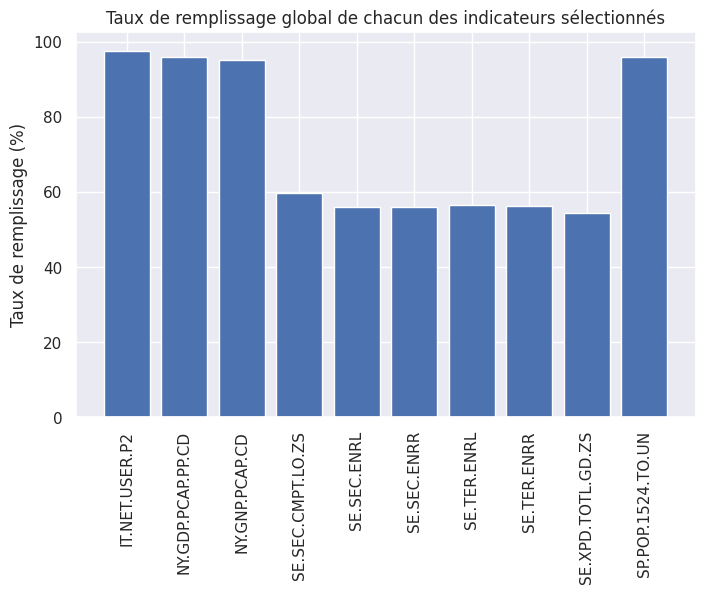

In [213]:
indicator_filling = (
    df_Ed_select.copy()
    .pivot_table(index=["Country Code", "Year"], columns="Series Code", values="Value")
    .notna()
    .mean() * 100
)

fig2 = plt.figure(figsize=(8, 5))
plt.title("Taux de remplissage global de chacun des indicateurs sélectionnés")
plt.xticks(rotation=90)
plt.ylabel("Taux de remplissage (%)")
plt.bar(indicator_filling.index.values, indicator_filling.values)
plt.show()

*Calcul et visualisation du taux de remplissage (pourcentage de valeurs non manquantes) pour chacun des indicateurs sélectionnés. Cela permet d'évaluer la complétude des données pour chaque indicateur et d'identifier ceux qui pourraient nécessiter une imputation ou une attention particulière en raison d'un grand nombre de valeurs manquantes.

## 4- Imputation des valeurs manquantes

### Application de l'interpolation linéaire sur `df_pivot`

Nous allons appliquer l'interpolation linéaire aux colonnes d'indicateurs de `df_pivot`, regroupées par `Country Code`. Cela permettra de combler les valeurs manquantes dans les séries chronologiques de chaque pays avant l'agrégation.

In [151]:
df_pivot_interpolated = df_pivot.copy()

indicator_cols = [col for col in df_pivot_interpolated.columns if col not in ['Country Code', 'Year']]
df_pivot_interpolated[indicator_cols] = df_pivot_interpolated.groupby('Country Code')[indicator_cols].transform(lambda group: group.interpolate(method='linear', limit_direction='both'))

print("df_pivot après interpolation linéaire:")
display(df_pivot_interpolated.head())


df_pivot après interpolation linéaire:


Series Code,Country Code,Country Name,Year,Income Group,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,NY.GNP.PCAP.CD,SE.SEC.CMPT.LO.ZS,SE.SEC.ENRL,SE.SEC.ENRR,SE.TER.ENRL,SE.TER.ENRR,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN
0,AGO,Angola,2010,Upper middle income,2.8,5775.864013,3240.0,22.517611,850334.0,28.781309,142798.0,6.946090,3.47623,3774989.0
1,AGO,Angola,2011,Upper middle income,3.1,5911.254334,3390.0,22.517611,884982.0,28.898720,142798.0,6.946090,3.47623,3875706.0
2,AGO,Angola,2012,Upper middle income,6.5,6109.136612,3820.0,22.517611,884982.0,28.898720,180738.5,8.434830,3.47623,3972550.0
3,AGO,Angola,2013,Upper middle income,8.9,6400.673376,4350.0,22.517611,884982.0,28.898720,218679.0,9.923570,3.47623,4067194.0
4,AGO,Angola,2014,Upper middle income,10.2,6594.397826,4470.0,22.517611,884982.0,28.898720,219858.0,9.615795,3.47623,4162115.0


In [152]:
# Sélectionner les colonnes numériques de df_pivot_interpolated (les indicateurs)
indicateurs_numeric = df_pivot_interpolated.select_dtypes(include=np.number).columns.tolist()
columns_to_exclude_from_std = ['Year', 'cagr_internet']
indicator_cols_for_std = [col for col in indicateurs_numeric if col not in columns_to_exclude_from_std]

# Calculer l'écart-type pour chaque indicateur, groupé par 'Country Code'
df_std_per_country_indicator = df_pivot_interpolated.groupby('Country Code')[indicator_cols_for_std].std()

print("Écart-type de chaque indicateur par pays (sur la période 2010-2015) :")
display(df_std_per_country_indicator.head())

Écart-type de chaque indicateur par pays (sur la période 2010-2015) :


Series Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,NY.GNP.PCAP.CD,SE.SEC.CMPT.LO.ZS,SE.SEC.ENRL,SE.SEC.ENRR,SE.TER.ENRL,SE.TER.ENRR,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN
Country Code,,,,,,,,,,
AGO,3.886086,362.932519,499.549797,0.000000,14144.986768,0.047933,37910.469536,1.323094,0.000000,180446.700727
BDI,1.504488,34.306641,31.885211,5.850748,125217.994649,7.563287,10304.623359,0.883097,0.546101,31426.583306
BEN,2.899263,144.934315,55.497748,3.701428,97558.973285,3.791241,16710.479878,1.335104,0.310647,102216.534385
BFA,3.894085,118.246078,46.797436,3.993298,157876.716551,4.331079,9471.583725,0.485899,0.304080,192652.600292
BWA,13.966454,1510.017387,736.224603,1.104329,NaN,NaN,9065.403304,3.828233,NaN,2812.324566


Calcul de l'écart-type pour chaque indicateur, regroupé par "Country Code", sur la période 2010-2015. Il exclut la colonne "Year" et "cagr_internet" (qui est un indicateur déjà agrégé sur la période) pour se concentrer uniquement sur la variabilité des indicateurs bruts. Cela nous donne une idée de la dispersion des valeurs pour chaque indicateur au sein de chaque pays au fil du temps.

In [153]:
# Calcul CARGR INTERNET 5 ANS ( 2010-2015)
def calcul_cagr_internet(df_pivot_interpolated):

    df_cagr_years = df_pivot_interpolated[df_pivot_interpolated['Year'].isin([2010, 2015])].copy()

    internet_pivot = df_cagr_years.pivot(
        index='Country Code',
        columns='Year',
        values='IT.NET.USER.P2'
    ).rename(columns={2010: 'internet_2010', 2015: 'internet_2015'})

    internet_pivot['cagr_internet'] = (
        (internet_pivot['internet_2015'] / (internet_pivot['internet_2010'])) ** (1/5) - 1
    ) * 100

    print("CAGR Internet 5 ans - Top 10:")
    return internet_pivot[['cagr_internet']]

cagr_internet_result = calcul_cagr_internet(df_pivot_interpolated)
display(cagr_internet_result.sort_values(by='cagr_internet', ascending=False).head(10))

CAGR Internet 5 ans - Top 10:


Year,cagr_internet
Country Code,
ETH,72.933585
SLE,61.358857
GIN,52.322048
CIV,51.969832
LSO,45.301648
BWA,44.125084
COD,39.473021
MLI,38.871800
BDI,37.226639




Ce bloc de code prend le résultat du calcul du CAGR (`cagr_internet_result`) et l'intègre dans le DataFrame principal `df_pivot_interpolated`. En effectuant une fusion (`pd.merge`) sur la colonne 'Country Code', nous ajoutons la nouvelle colonne 'cagr_internet' à notre ensemble de données, ce qui permet d'utiliser cet indicateur dans les calculs ultérieurs du Momentum Score.

In [154]:
cagr_internet_df = cagr_internet_result.reset_index()

df_pivot_interpolated = pd.merge(
    df_pivot_interpolated,
    cagr_internet_df,
    on='Country Code',
    how='left'
)
print("DataFrame 'df_pivot_interpolated' après ajout de la colonne 'cagr_internet' :")
display(df_pivot_interpolated.head())

DataFrame 'df_pivot_interpolated' après ajout de la colonne 'cagr_internet' :


,Country Code,Country Name,Year,Income Group,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,NY.GNP.PCAP.CD,SE.SEC.CMPT.LO.ZS,SE.SEC.ENRL,SE.SEC.ENRR,SE.TER.ENRL,SE.TER.ENRR,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN,cagr_internet
0,AGO,Angola,2010,Upper middle income,2.8,5775.864013,3240.0,22.517611,850334.0,28.781309,142798.0,6.946090,3.47623,3774989.0,34.664378
1,AGO,Angola,2011,Upper middle income,3.1,5911.254334,3390.0,22.517611,884982.0,28.898720,142798.0,6.946090,3.47623,3875706.0,34.664378
2,AGO,Angola,2012,Upper middle income,6.5,6109.136612,3820.0,22.517611,884982.0,28.898720,180738.5,8.434830,3.47623,3972550.0,34.664378
3,AGO,Angola,2013,Upper middle income,8.9,6400.673376,4350.0,22.517611,884982.0,28.898720,218679.0,9.923570,3.47623,4067194.0,34.664378
4,AGO,Angola,2014,Upper middle income,10.2,6594.397826,4470.0,22.517611,884982.0,28.898720,219858.0,9.615795,3.47623,4162115.0,34.664378


On prend le résultat du calcul du CAGR (`cagr_internet_result`) et on l'intègre dans le DataFrame principal `df_pivot_interpolated`. En effectuant une fusion (`pd.merge`) sur la colonne 'Country Code', nous ajoutons la nouvelle colonne 'cagr_internet' à notre ensemble de données, ce qui permet d'utiliser cet indicateur dans les calculs ultérieurs du Momentum Score.

###4.2.  Recalculer df_aggregated avec les valeurs imputées par la moyenne globale

Ce bloc de code procède à l'agrégation finale des données après l'imputation des valeurs manquantes. Il recalcule le DataFrame `df_aggregated_final` en prenant la moyenne de chaque indicateur numérique par `Country Code` à partir de `df_pivot_imputed_global_mean`. Les colonnes 'Country Name' et 'Income Group' sont conservées en prenant leur première valeur.

Ensuite, il recalcule l'indicateur clé 'TAM_Connected_Learners' (Total Addressable Market pour les apprenants connectés) en utilisant les colonnes 'SP.POP.1524.TO.UN' (population 15-24 ans) et 'IT.NET.USER.P2' (utilisateurs Internet) qui ont été agrégées. Enfin, il affiche les premières lignes du DataFrame agrégé et vérifie les valeurs pour les pays 'SSD' et 'SYC' pour s'assurer de la cohérence après l'imputation et l'agrégation.

In [155]:
# Identifier les colonnes d'indicateurs (excluant 'Country Code', 'Year', 'Country Name', 'Income Group')
indicator_cols = [col for col in df_pivot_interpolated.columns if col not in ['Country Code', 'Year', 'Country Name', 'Income Group']]

# Calculer la moyenne globale pour chaque colonne d'indicateur
mean_values = df_pivot_interpolated[indicator_cols].mean()

print("Moyennes globales calculées pour l'imputation :")
display(mean_values)

# Combler les NaN restants avec les moyennes globales
df_pivot_imputed_global_mean = df_pivot_interpolated.fillna(mean_values)

print("\nNombre de valeurs manquantes par colonne après imputation par la moyenne globale :")
display(df_pivot_imputed_global_mean.isna().sum())

print("\nDataFrame 'df_pivot_imputed_global_mean' après imputation :")
display(df_pivot_imputed_global_mean.head())

Moyennes globales calculées pour l'imputation :


,0
IT.NET.USER.P2,1.223652e+01
NY.GDP.PCAP.PP.CD,4.870756e+03
NY.GNP.PCAP.CD,2.237128e+03
SE.SEC.CMPT.LO.ZS,4.307972e+01
SE.SEC.ENRL,1.227085e+06
SE.SEC.ENRR,4.504907e+01
SE.TER.ENRL,1.734593e+05
SE.TER.ENRR,8.877585e+00
SE.XPD.TOTL.GD.ZS,4.303696e+00
SP.POP.1524.TO.UN,4.067790e+06



Nombre de valeurs manquantes par colonne après imputation par la moyenne globale :


,0
Country Code,0
Country Name,0
Year,0
Income Group,0
IT.NET.USER.P2,0
NY.GDP.PCAP.PP.CD,0
NY.GNP.PCAP.CD,0
SE.SEC.CMPT.LO.ZS,0
SE.SEC.ENRL,0
SE.SEC.ENRR,0



DataFrame 'df_pivot_imputed_global_mean' après imputation :


,Country Code,Country Name,Year,Income Group,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,NY.GNP.PCAP.CD,SE.SEC.CMPT.LO.ZS,SE.SEC.ENRL,SE.SEC.ENRR,SE.TER.ENRL,SE.TER.ENRR,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN,cagr_internet
0,AGO,Angola,2010,Upper middle income,2.8,5775.864013,3240.0,22.517611,850334.0,28.781309,142798.0,6.946090,3.47623,3774989.0,34.664378
1,AGO,Angola,2011,Upper middle income,3.1,5911.254334,3390.0,22.517611,884982.0,28.898720,142798.0,6.946090,3.47623,3875706.0,34.664378
2,AGO,Angola,2012,Upper middle income,6.5,6109.136612,3820.0,22.517611,884982.0,28.898720,180738.5,8.434830,3.47623,3972550.0,34.664378
3,AGO,Angola,2013,Upper middle income,8.9,6400.673376,4350.0,22.517611,884982.0,28.898720,218679.0,9.923570,3.47623,4067194.0,34.664378
4,AGO,Angola,2014,Upper middle income,10.2,6594.397826,4470.0,22.517611,884982.0,28.898720,219858.0,9.615795,3.47623,4162115.0,34.664378


 la première interpolation utilise "linéaire et par pays" pour les NaN "faciles" à estimer,
 la seconde interpolation : on utilise la méthode (moyenne globale) pour les NaN "difficiles" afin de garantir un jeu de données complet pour les calculs finaux des scores MAS. Ces deux étapes sont complémentaires

## Calculer la moyenne sur 5 ans par pays


Calculer la moyenne de chaque indicateur pour chaque pays sur la période 2010-2015 à partir du DataFrame `df_pivot`. Cela permettra d'obtenir une valeur agrégée par pays sur la période de 5 ans.


In [156]:
numeric_cols = df_pivot_imputed_global_mean.select_dtypes(include=np.number).columns.tolist()
if 'Year' in numeric_cols:
    numeric_cols.remove('Year')

# Definition d'un dictionnaire
agg_dict = {col: 'mean' for col in numeric_cols}

if 'Country Name' in df_pivot_imputed_global_mean.columns:
    agg_dict['Country Name'] = 'first'
if 'Income Group' in df_pivot_imputed_global_mean.columns:
    agg_dict['Income Group'] = 'first'

df_aggregated_final = df_pivot_imputed_global_mean.groupby('Country Code').agg(agg_dict).reset_index()


print("\nDataFrame agrégé final après toutes les imputations et recalcul de 'TAM_Connected_Learners':")
display(df_aggregated_final.head())



DataFrame agrégé final après toutes les imputations et recalcul de 'TAM_Connected_Learners':


,Country Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,NY.GNP.PCAP.CD,SE.SEC.CMPT.LO.ZS,SE.SEC.ENRL,SE.SEC.ENRR,SE.TER.ENRL,SE.TER.ENRR,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN,cagr_internet,Country Name,Income Group
0,AGO,7.316667,6239.908363,3885.000000,22.517611,8.792073e+05,28.879151,187651.416667,8.529066,3.476230,4.018651e+06,34.664378,Angola,Upper middle income
1,BDI,1.806740,795.970402,258.333333,22.536701,4.795240e+05,31.481220,40327.833333,4.023460,5.811462,2.046434e+06,37.226639,Burundi,Low income
2,BEN,5.655552,1953.852499,850.000000,40.656552,8.288921e+05,51.938069,130706.833333,14.189098,4.681107,2.124746e+06,29.169548,Benin,Low income
3,BFA,6.502114,1567.260740,635.000000,21.318220,7.313957e+05,27.342652,67314.333333,4.435182,4.289498,3.521778e+06,36.535173,Burkina Faso,Low income
4,BWA,22.509466,15120.078387,6853.333333,87.762604,1.227085e+06,45.049070,49999.333333,22.176585,4.303696,4.355607e+05,44.125084,Botswana,Upper middle income


# 5. INGENIERIE DES VARIABLES

### 5.1. Calcul du CAGR Internet sur 5 ans

In [157]:
# Calcul CARGR INTERNET 5 ANS ( 2010-2015)
def calcul_cagr_internet(df_pivot_interpolated):

    df_cagr_years = df_pivot_interpolated[df_pivot_interpolated['Year'].isin([2010, 2015])].copy()

    internet_pivot = df_cagr_years.pivot(
        index='Country Code',
        columns='Year',
        values='IT.NET.USER.P2'
    ).rename(columns={2010: 'internet_2010', 2015: 'internet_2015'})

    internet_pivot['cagr_internet'] = (
        (internet_pivot['internet_2015'] / (internet_pivot['internet_2010'])) ** (1/5) - 1
    ) * 100

    print("CAGR Internet 5 ans - Top 10:")
    return internet_pivot[['cagr_internet']]

cagr_internet_result = calcul_cagr_internet(df_pivot_interpolated)
display(cagr_internet_result.sort_values(by='cagr_internet', ascending=False).head(10))

CAGR Internet 5 ans - Top 10:


Year,cagr_internet
Country Code,
ETH,72.933585
SLE,61.358857
GIN,52.322048
CIV,51.969832
LSO,45.301648
BWA,44.125084
COD,39.473021
MLI,38.871800
BDI,37.226639


### 5.2. Calcul du TAM (Total Addressable Market) des apprenants connectés

### Calcul du "TAM apprenants connectés"

In [162]:
print("Nombre de valeurs manquantes par colonne dans df_pivot_interpolated :")
display(df_aggregated_final.isna().sum())

Nombre de valeurs manquantes par colonne dans df_pivot_interpolated :


,0
Country Code,0
IT.NET.USER.P2,0
NY.GDP.PCAP.PP.CD,0
NY.GNP.PCAP.CD,0
SE.SEC.CMPT.LO.ZS,0
SE.SEC.ENRL,0
SE.SEC.ENRR,0
SE.TER.ENRL,0
SE.TER.ENRR,0
SE.XPD.TOTL.GD.ZS,0


In [163]:
df_aggregated = df_aggregated_final.copy()

print("Taille  df_aggregated:", df_aggregated.shape)
display(df_aggregated.head())

Taille  df_aggregated: (48, 14)


,Country Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,NY.GNP.PCAP.CD,SE.SEC.CMPT.LO.ZS,SE.SEC.ENRL,SE.SEC.ENRR,SE.TER.ENRL,SE.TER.ENRR,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN,cagr_internet,Country Name,Income Group
0,AGO,7.316667,6239.908363,3885.000000,22.517611,8.792073e+05,28.879151,187651.416667,8.529066,3.476230,4.018651e+06,34.664378,Angola,Upper middle income
1,BDI,1.806740,795.970402,258.333333,22.536701,4.795240e+05,31.481220,40327.833333,4.023460,5.811462,2.046434e+06,37.226639,Burundi,Low income
2,BEN,5.655552,1953.852499,850.000000,40.656552,8.288921e+05,51.938069,130706.833333,14.189098,4.681107,2.124746e+06,29.169548,Benin,Low income
3,BFA,6.502114,1567.260740,635.000000,21.318220,7.313957e+05,27.342652,67314.333333,4.435182,4.289498,3.521778e+06,36.535173,Burkina Faso,Low income
4,BWA,22.509466,15120.078387,6853.333333,87.762604,1.227085e+06,45.049070,49999.333333,22.176585,4.303696,4.355607e+05,44.125084,Botswana,Upper middle income


In [164]:
# Calcul de l'indicateur 'TAM apprenants connectés'
df_aggregated['TAM_Connected_Learners'] = df_aggregated['SP.POP.1524.TO.UN'] * (df_aggregated['IT.NET.USER.P2'] / 100)
display(df_aggregated.head())

,Country Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,NY.GNP.PCAP.CD,SE.SEC.CMPT.LO.ZS,SE.SEC.ENRL,SE.SEC.ENRR,SE.TER.ENRL,SE.TER.ENRR,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN,cagr_internet,Country Name,Income Group,TAM_Connected_Learners
0,AGO,7.316667,6239.908363,3885.000000,22.517611,8.792073e+05,28.879151,187651.416667,8.529066,3.476230,4.018651e+06,34.664378,Angola,Upper middle income,294031.298167
1,BDI,1.806740,795.970402,258.333333,22.536701,4.795240e+05,31.481220,40327.833333,4.023460,5.811462,2.046434e+06,37.226639,Burundi,Low income,36973.744224
2,BEN,5.655552,1953.852499,850.000000,40.656552,8.288921e+05,51.938069,130706.833333,14.189098,4.681107,2.124746e+06,29.169548,Benin,Low income,120166.101846
3,BFA,6.502114,1567.260740,635.000000,21.318220,7.313957e+05,27.342652,67314.333333,4.435182,4.289498,3.521778e+06,36.535173,Burkina Faso,Low income,228989.970772
4,BWA,22.509466,15120.078387,6853.333333,87.762604,1.227085e+06,45.049070,49999.333333,22.176585,4.303696,4.355607e+05,44.125084,Botswana,Upper middle income,98042.381487


In [165]:
df_aggregated.columns.name = None
display(df_aggregated.head())

,Country Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,NY.GNP.PCAP.CD,SE.SEC.CMPT.LO.ZS,SE.SEC.ENRL,SE.SEC.ENRR,SE.TER.ENRL,SE.TER.ENRR,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN,cagr_internet,Country Name,Income Group,TAM_Connected_Learners
0,AGO,7.316667,6239.908363,3885.000000,22.517611,8.792073e+05,28.879151,187651.416667,8.529066,3.476230,4.018651e+06,34.664378,Angola,Upper middle income,294031.298167
1,BDI,1.806740,795.970402,258.333333,22.536701,4.795240e+05,31.481220,40327.833333,4.023460,5.811462,2.046434e+06,37.226639,Burundi,Low income,36973.744224
2,BEN,5.655552,1953.852499,850.000000,40.656552,8.288921e+05,51.938069,130706.833333,14.189098,4.681107,2.124746e+06,29.169548,Benin,Low income,120166.101846
3,BFA,6.502114,1567.260740,635.000000,21.318220,7.313957e+05,27.342652,67314.333333,4.435182,4.289498,3.521778e+06,36.535173,Burkina Faso,Low income,228989.970772
4,BWA,22.509466,15120.078387,6853.333333,87.762604,1.227085e+06,45.049070,49999.333333,22.176585,4.303696,4.355607e+05,44.125084,Botswana,Upper middle income,98042.381487


In [166]:
df_aggregated['effectif_totl'] = df_aggregated['SE.SEC.ENRL'] + df_aggregated['SE.TER.ENRL']
df_aggregated.head()

,Country Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,NY.GNP.PCAP.CD,SE.SEC.CMPT.LO.ZS,SE.SEC.ENRL,SE.SEC.ENRR,SE.TER.ENRL,SE.TER.ENRR,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN,cagr_internet,Country Name,Income Group,TAM_Connected_Learners,effectif_totl
0,AGO,7.316667,6239.908363,3885.000000,22.517611,8.792073e+05,28.879151,187651.416667,8.529066,3.476230,4.018651e+06,34.664378,Angola,Upper middle income,294031.298167,1.066859e+06
1,BDI,1.806740,795.970402,258.333333,22.536701,4.795240e+05,31.481220,40327.833333,4.023460,5.811462,2.046434e+06,37.226639,Burundi,Low income,36973.744224,5.198518e+05
2,BEN,5.655552,1953.852499,850.000000,40.656552,8.288921e+05,51.938069,130706.833333,14.189098,4.681107,2.124746e+06,29.169548,Benin,Low income,120166.101846,9.595989e+05
3,BFA,6.502114,1567.260740,635.000000,21.318220,7.313957e+05,27.342652,67314.333333,4.435182,4.289498,3.521778e+06,36.535173,Burkina Faso,Low income,228989.970772,7.987100e+05
4,BWA,22.509466,15120.078387,6853.333333,87.762604,1.227085e+06,45.049070,49999.333333,22.176585,4.303696,4.355607e+05,44.125084,Botswana,Upper middle income,98042.381487,1.277085e+06


### Creation de la matrice de corrélation

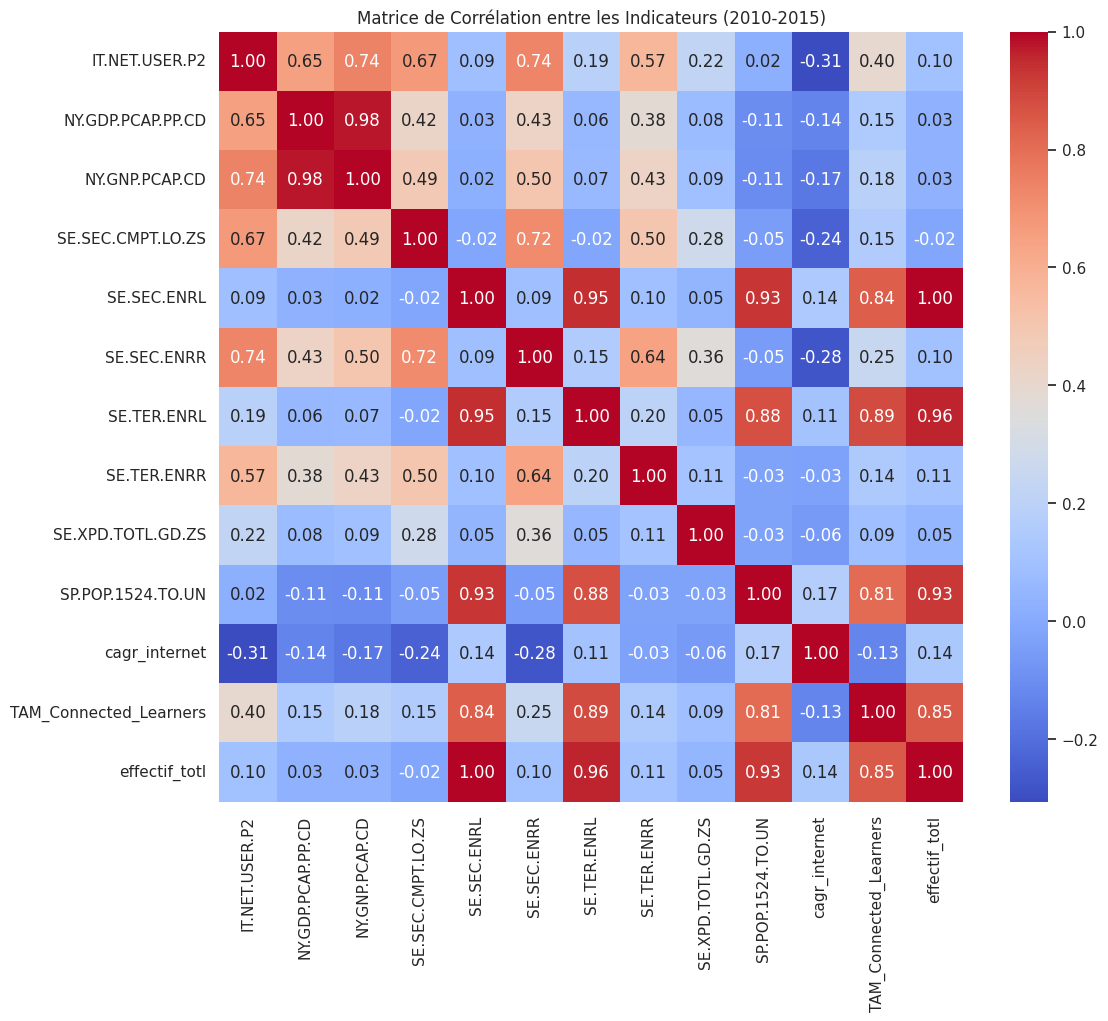

In [167]:
correlation_matrix = df_aggregated.drop(columns=['Country Code','Country Name', 'Income Group']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation entre les Indicateurs (2010-2015)')
plt.show()


Visualisalisation de  la matrice de corrélation entre les indicateurs numériques agrégés sur 5 ans (`df_aggregated`). L'objectif est de comprendre les relations directes entre les différentes variables (population, connectivité Internet, PIB, dépenses éducatives, etc.) avant leur transformation en scores MAS.

In [168]:
df_tam_connected_learners = df_aggregated[['Country Code', 'TAM_Connected_Learners']].copy()
display(df_tam_connected_learners.head(5).style.hide(axis='index'))

Country Code,TAM_Connected_Learners
AGO,294031.298167
BDI,36973.744224
BEN,120166.101846
BFA,228989.970772
BWA,98042.381487


# 5. CALCUL DU MAS (Market Attractiveness Score (MAS) )

In [169]:
indicateurs_select

['SP.POP.1524.TO.UN',
 'SE.TER.ENRR',
 'SE.SEC.ENRR',
 'SE.SEC.CMPT.LO.ZS',
 'SE.SEC.ENRL',
 'SE.TER.ENRL',
 'IT.NET.USER.P2',
 'NY.GDP.PCAP.PP.CD',
 'NY.GNP.PCAP.CD',
 'SE.XPD.TOTL.GD.ZS',
 'IT.NET.USER.P2']

In [172]:
# CALCUL MARKET ATTRACTIVENESS SCORE (MAS)
def normalize_minmax(series):
    """Normalisation min-max [0-100]"""
    return 100 * (series - series.min()) / (series.max() - series.min())

# MAS par sous-score (moyenne pondérée des indicateurs)
df_mas = df_aggregated.copy()

# Redefinition des noms d'indicateurs
rename_map = {
    'SP.POP.1524.TO.UN': 'Population 15-24 ans',
    'SE.TER.ENRR': 'Taux brut sco. tertiaire',
    'SE.SEC.ENRR': 'Taux brut sco. secondaire',
    'SE.SEC.CMPT.LO.ZS': 'Achèvement secondaire',
    'SE.SEC.ENRL': 'Effectif secondaire',
    'SE.TER.ENRL': 'Effectif tertiaire',
    'NY.GDP.PCAP.PP.CD': 'PIB par hab. (PPA)',
    'NY.GNP.PCAP.CD': 'RNB par hab',
    'SE.XPD.TOTL.GD.ZS': 'Dépenses éduc. (% PIB)',
    'IT.NET.USER.P2': 'Utilisateurs Internet',
    'cagr_internet': 'CAGR Internet',
    'TAM_Connected_Learners': 'TAM apprenants connectés',
    'effectif_totl': 'Effectifs scolaires',
}

# Renommer les colonnes d'indicateurs dans df_mas
df_mas = df_mas.rename(columns=rename_map)

Fonction de Normalisation normalize_minmax :

Une fonction utilitaire est définie pour normaliser toutes les valeurs des indicateurs et des sous-scores sur une échelle de 0 à 100. Cela permet de rendre les différents indicateurs comparables entre eux, indépendamment de leurs unités ou de leurs plages de valeurs originales.
Renommage des Indicateurs :

Un dictionnaire rename_map est créé pour attribuer des noms plus lisibles et descriptifs aux colonnes des indicateurs ('Series Code') dans le DataFrame df_mas.

In [173]:
# 1. Scale Score (35%) - Taille marché
df_mas['scale_score'] = df_mas[['Population 15-24 ans', 'Taux brut sco. tertiaire', 'Taux brut sco. secondaire', 'Effectifs scolaires', 'TAM apprenants connectés']].mean(axis=1)
df_mas['scale_score'] = normalize_minmax(df_mas['scale_score'])

# 2️. Momentum Score (25%) - Dynamique
df_mas['momentum_score'] = df_mas[['Achèvement secondaire', 'Effectif secondaire', 'Effectif tertiaire', 'CAGR Internet']].mean(axis=1)
df_mas['momentum_score'] = normalize_minmax(df_mas['momentum_score'])

# 3️. Ability to Pay (25%) - Solvabilité
df_mas['pay_score'] = df_mas[['PIB par hab. (PPA)', 'RNB par hab', 'Dépenses éduc. (% PIB)']].mean(axis=1)
df_mas['pay_score'] = normalize_minmax(df_mas['pay_score'])

# 4️. Digital Readiness (15%) - Faisabilité
df_mas['digital_score'] = normalize_minmax(df_mas['Utilisateurs Internet'].fillna(0))


Calcul des Quatre Sous-Scores du MAS :

Scale Score (Taille du marché - 35% de la pondération finale) :

Calculé comme la moyenne des indicateurs liés à la population jeune, aux taux et effectifs de scolarisation (secondaire/tertiaire), et au TAM apprenants connectés. Le résultat est ensuite normalisé.

Momentum Score (Dynamique de croissance - 25% de la pondération finale) : Calculé comme la moyenne du taux d'achèvement secondaire, des effectifs secondaires et tertiaires, et du CAGR Internet. Le résultat est également normalisé.

Ability to Pay Score (Capacité de paiement - 25% de la pondération finale) : Basé sur le PIB par habitant, le RNB par habitant et les dépenses éducatives en pourcentage du PIB. Ce sous-score est aussi normalisé.

Digital Readiness Score (Préparation numérique - 15% de la pondération finale) : Directement dérivé de l'indicateur d'utilisateurs Internet, et est normalisé après avoir remplacé les éventuelles valeurs manquantes par 0 (bien que l'imputation précédente ait déjà minimisé cela).

In [174]:
# MAS FINAL (pondéré)
df_mas['MAS'] = (
    0.35 * df_mas['scale_score'] +
    0.25 * df_mas['momentum_score'] +
    0.25 * df_mas['pay_score'] +
    0.15 * df_mas['digital_score']
)
# Data Sufficiency Adjustment (pénalité couverture données)
completeness = df_mas[['scale_score', 'momentum_score', 'pay_score', 'digital_score']].notna().mean(axis=1)
df_mas['MAS_final'] = df_mas['MAS'] * completeness

Calcul du MAS Final Pondéré :

Le MAS est calculé comme une somme pondérée des quatre sous-scores, en utilisant les pourcentages définis pour chaque pilier (35% Scale, 25% Momentum, 25% Ability to Pay, 15% Digital Readiness).
Ajustement pour la Complétude des Données (Data Sufficiency Adjustment) :

In [175]:
# Data Sufficiency Adjustment (pénalité couverture données)
completeness = df_mas[['scale_score', 'momentum_score', 'pay_score', 'digital_score']].notna().mean(axis=1)
df_mas['MAS_final'] = df_mas['MAS'] * completeness

# Créer un DataFrame de classement et le trier
df_ranking = df_mas[['Country Code', 'MAS_final']].copy()
df_ranking = df_ranking.sort_values('MAS_final', ascending=False).reset_index(drop=True)

print(" CLASSEMENT MAS TOP 10:")
print(df_ranking.head(10).round(1))

 CLASSEMENT MAS TOP 10:
  Country Code  MAS_final
0          NGA       69.3
1          ZAF       48.2
2          SYC       39.3
3          GNQ       33.1
4          ETH       29.7
5          MUS       27.5
6          GAB       26.3
7          BWA       22.4
8          SDN       22.4
9          COD       21.8


Ajustement pour la Complétude des Données (Data Sufficiency Adjustment) :

Un facteur de complétude (completeness) est calculé comme la proportion des sous-scores qui ne sont pas manquants pour chaque pays. Ce facteur est ensuite multiplié par le MAS pour créer le MAS_final. Cet ajustement pénalise les pays pour lesquels un ou plusieurs sous-scores n'ont pas pu être calculés (par exemple, à cause de données trop manquantes), assurant ainsi que le score final reflète non seulement l'attractivité, mais aussi la fiabilité de l'évaluation.
Classement des Pays :

Le DataFrame df_mas est utilisé pour créer df_ranking, qui est ensuite trié par MAS_final en ordre décroissant, affichant ainsi les 10 pays les plus attractifs selon le modèle.

In [177]:
# Créer un DataFrame de classement et le trier
df_ranking = df_mas[['Country Code', 'MAS_final']].copy()
df_ranking = df_ranking.sort_values('MAS_final', ascending=False).reset_index(drop=True)

print(" CLASSEMENT MAS TOP 10:")
print(df_ranking.head(10).round(1))

 CLASSEMENT MAS TOP 10:
  Country Code  MAS_final
0          NGA       69.3
1          ZAF       48.2
2          SYC       39.3
3          GNQ       33.1
4          ETH       29.7
5          MUS       27.5
6          GAB       26.3
7          BWA       22.4
8          SDN       22.4
9          COD       21.8




Un facteur de complétude (completeness) est calculé comme la proportion des sous-scores qui ne sont pas manquants pour chaque pays. Ce facteur est ensuite multiplié par le MAS pour créer le MAS_final. Cet ajustement pénalise les pays pour lesquels un ou plusieurs sous-scores n'ont pas pu être calculés (par exemple, à cause de données trop manquantes), assurant ainsi que le score final reflète non seulement l'attractivité, mais aussi la fiabilité de l'évaluation.

### Écart-type des composantes du MAS par pays

In [195]:
mas_component_cols = ['digital_score', 'momentum_score', 'pay_score', 'scale_score']

# Calculer et afficher les statistiques pour chaque composante séparément
for component in mas_component_cols:
    print(f"Statistiques descriptives pour '{component}' par pays :")
    if component in df_mas.columns:
        df_stats_component = df_mas.groupby('Country Code')[component].agg(['mean', 'median', 'min', 'max'])
        display(df_stats_component.head())
    else:
        print(f"La colonne '{component}' n'a pas été trouvée dans df_mas_yearly. Veuillez vérifier le DataFrame.")


Statistiques descriptives pour 'digital_score' par pays :


,mean,median,min,max
Country Code,,,,
AGO,13.761189,13.761189,13.761189,13.761189
BDI,2.040875,2.040875,2.040875,2.040875
BEN,10.227787,10.227787,10.227787,10.227787
BFA,12.028531,12.028531,12.028531,12.028531
BWA,46.078205,46.078205,46.078205,46.078205


Statistiques descriptives pour 'momentum_score' par pays :


,mean,median,min,max
Country Code,,,,
AGO,8.430228,8.430228,8.430228,8.430228
BDI,4.075844,4.075844,4.075844,4.075844
BEN,7.576495,7.576495,7.576495,7.576495
BFA,6.295657,6.295657,6.295657,6.295657
BWA,10.104309,10.104309,10.104309,10.104309


Statistiques descriptives pour 'pay_score' par pays :


,mean,median,min,max
Country Code,,,,
AGO,20.535012,20.535012,20.535012,20.535012
BDI,0.000000,0.000000,0.000000,0.000000
BEN,3.959277,3.959277,3.959277,3.959277
BFA,2.596092,2.596092,2.596092,2.596092
BWA,47.367711,47.367711,47.367711,47.367711


Statistiques descriptives pour 'scale_score' par pays :


,mean,median,min,max
Country Code,,,,
AGO,9.964845,9.964845,9.964845,9.964845
BDI,4.762527,4.762527,4.762527,4.762527
BEN,5.889235,5.889235,5.889235,5.889235
BFA,8.409426,8.409426,8.409426,8.409426
BWA,3.277432,3.277432,3.277432,3.277432


In [198]:
# = Filtrage avant describe()
def stats_robustes(df, colonnes):
    """Calcule les stats descriptives en gérant les NaN"""
    stats = pd.DataFrame(index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

    for col in colonnes:
        serie = df[col].dropna()
        if len(serie) > 1:  # Au moins 2 valeurs pour calculer std
            stats[col] = serie.describe()
        elif len(serie) == 1:
            stats[col] = [1, serie.iloc[0], np.nan, serie.iloc[0]]*2 + [serie.iloc[0]]
        else:
            stats[col] = [0, np.nan, np.nan, np.nan]*2 + [np.nan]

    return stats.T

colonnes_mas = ['digital_score', 'momentum_score', 'pay_score', 'scale_score']
stats_mas = stats_robustes(df_mas, colonnes_mas)
print("Statistiques MAS robustes :")
display(stats_mas)

Statistiques MAS robustes :


,count,mean,std,min,25%,50%,75%,max
digital_score,48.0,24.226349,23.585165,0.0,7.828277,17.440700,30.288422,100.0
momentum_score,48.0,11.086597,16.545827,0.0,2.389782,7.590095,11.086719,100.0
pay_score,48.0,13.704860,21.562200,0.0,2.264199,4.913643,14.085857,100.0
scale_score,48.0,11.088962,16.612576,0.0,2.686678,6.024993,11.602117,100.0


In [211]:
print("Médianes des composantes du MAS (sur une échelle de 0 à 100) :\n")
print(median_scores.sort_values(ascending=False))

Médianes des composantes du MAS (sur une échelle de 0 à 100) :

digital_score     17.440700
momentum_score     7.590095
scale_score        6.024993
pay_score          4.913643
dtype: float64


### Statistiques descriptives robustes des composantes du MAS
definition de la  fonction `stats_robustes` pour calculer des statistiques descriptives (moyenne, médiane, écart-type, min, max, quartiles) pour les composantes du Market Attractiveness Score (MAS). L'objectif est d'obtenir une vue d'ensemble de la distribution de chaque score ('digital_score', 'momentum_score', 'pay_score', 'scale_score')

# 6. VISUALISATION

### 1. Classement MAS TOP 10 - Afrique Subsaharienne

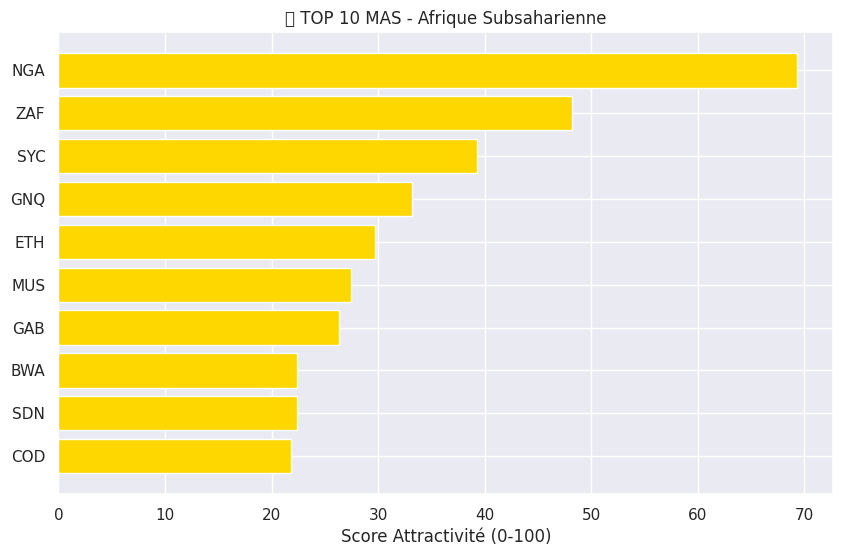

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
top10 = df_ranking.head(10)
plt.barh(range(len(top10)), top10['MAS_final'], color='gold')
plt.yticks(range(len(top10)), top10['Country Code'])
plt.title('🥇 TOP 10 MAS - Afrique Subsaharienne')
plt.xlabel('Score Attractivité (0-100)')
plt.gca().invert_yaxis() # Pour avoir le meilleur en haut
plt.show()

Affichage  des 10 pays d'Afrique subsaharienne les plus attractifs pour les investissements EdTech, selon le MAS final. Il met en évidence les leaders du marché en termes d'opportunités globales.

### 2. Heatmap des Sous-scores MAS (Top 15)

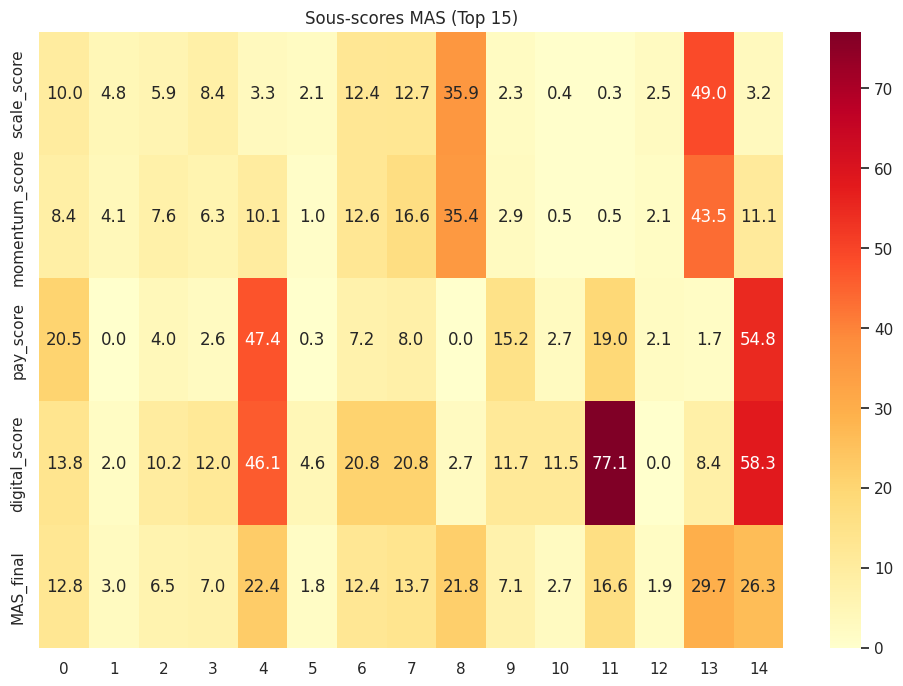

In [183]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_mas[['scale_score', 'momentum_score', 'pay_score', 'digital_score', 'MAS_final']].head(15).T,
            annot=True, cmap='YlOrRd', fmt=".1f")
plt.title('Sous-scores MAS (Top 15)')
plt.show()



Cette heatmap visualise la performance des 15 premiers pays sur chacun des quatre piliers du MAS (taille du marché, dynamique, capacité de paiement, préparation numérique). Les couleurs plus foncées indiquent de meilleures performances, permettant d'identifier rapidement les forces et faiblesses de chaque pays sur les différents critères.

### 3. Population Jeune vs Connectivité Digitale

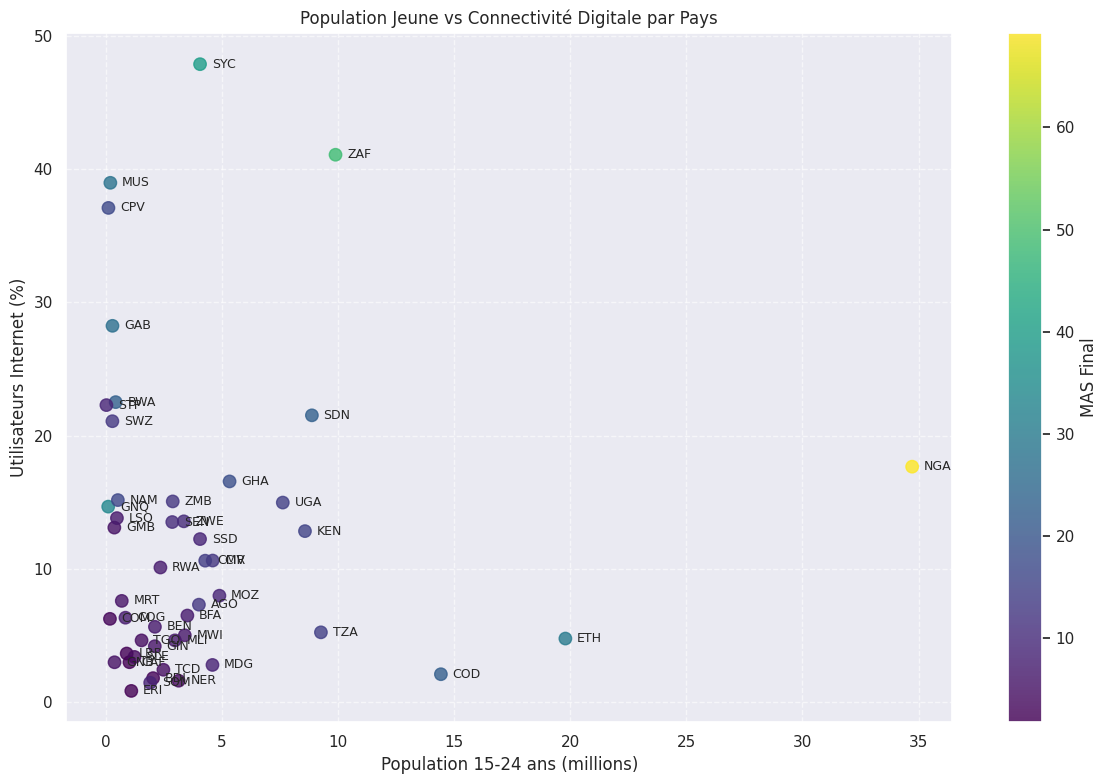

In [184]:

plt.figure(figsize=(12, 8))
plt.scatter(df_mas['Population 15-24 ans']/1e6, df_mas['Utilisateurs Internet'],
                 c=df_mas['MAS_final'], s=80, cmap='viridis', alpha=0.8)
plt.xlabel('Population 15-24 ans (millions)')
plt.ylabel('Utilisateurs Internet (%)')
plt.title('Population Jeune vs Connectivité Digitale par Pays')
plt.colorbar(label='MAS Final')

# Ajouter les étiquettes de pays
for i, row in df_mas.iterrows():
    plt.text(row['Population 15-24 ans']/1e6 + 0.5, row['Utilisateurs Internet'],
             row['Country Code'], fontsize=9, ha='left', va='center')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Ce graphique explore la relation entre la population âgée de 15 à 24 ans (potentiels apprenants) et le pourcentage d'utilisateurs d'Internet. La couleur des points représente le MAS final, permettant d'identifier les pays avec une grande population jeune et une bonne connectivité, éléments clés pour l'EdTech.

### Pays avec le MAS Final le plus élevé et le plus bas

In [185]:
print("\n Top 5 des pays avec le MAS Final le plus élevé :")
display(df_ranking.head(5))

print("\nWorst 5 des pays avec le MAS Final le plus bas :")
display(df_ranking.tail(5))


 Top 5 des pays avec le MAS Final le plus élevé :


,Country Code,MAS_final
0,NGA,69.264605
1,ZAF,48.192687
2,SYC,39.256380
3,GNQ,33.145704
4,ETH,29.686384



Worst 5 des pays avec le MAS Final le plus bas :


,Country Code,MAS_final
43,BDI,2.991977
44,COM,2.682777
45,LBR,2.217644
46,ERI,1.925261
47,CAF,1.766635


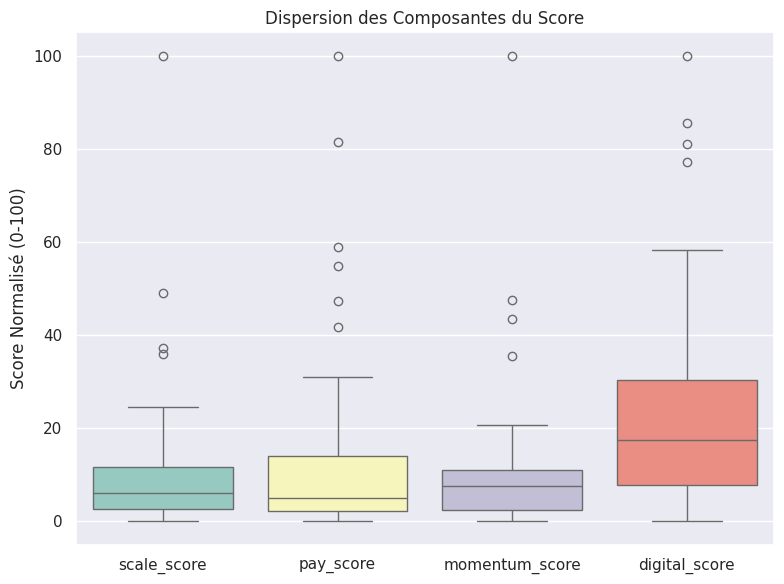

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(8, 6)) # Un seul sous-graphique

# Boxplot par indicateur normalisé
sns.boxplot(data=df_mas[['scale_score', 'pay_score', 'momentum_score', 'digital_score']], ax=ax, palette='Set3')
ax.set_title('Dispersion des Composantes du Score')
ax.set_ylabel('Score Normalisé (0-100)')

plt.tight_layout()
plt.show()

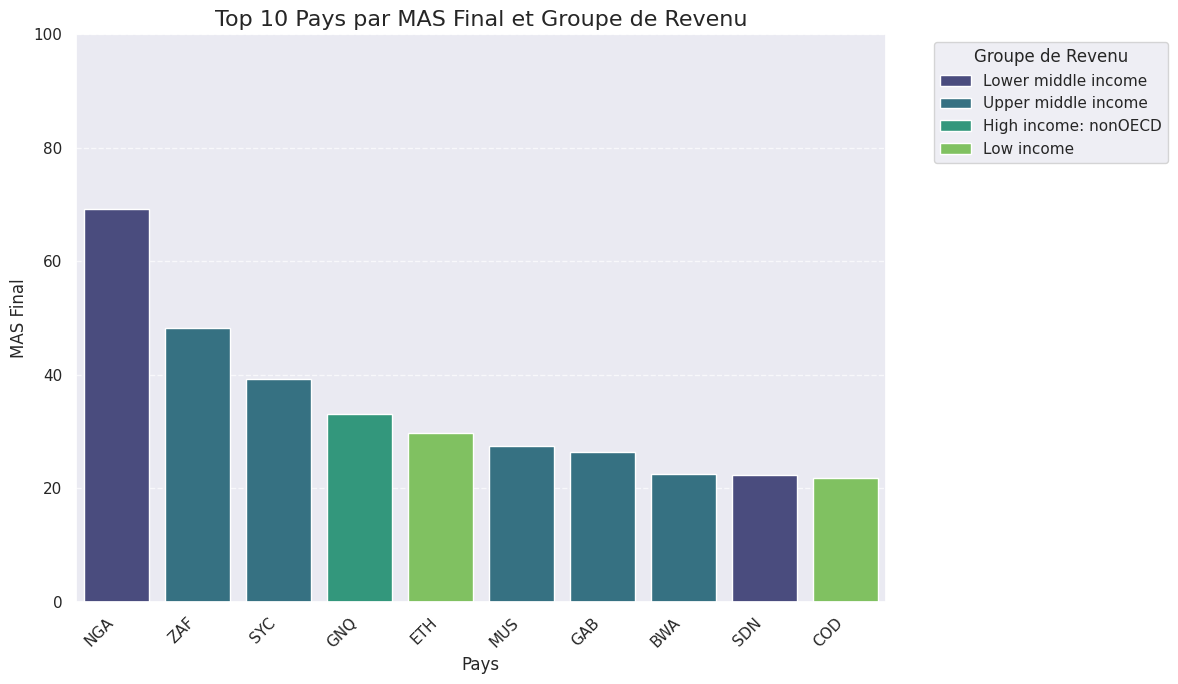

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fusionner df_ranking avec df_mas pour obtenir les Income Group des top 10 pays
top10_with_income = df_ranking.head(10).merge(
    df_mas[['Country Code', 'Income Group']],
    on='Country Code',
    how='left'
)

plt.figure(figsize=(12, 7))
sns.barplot(
    x='Country Code',
    y='MAS_final',
    hue='Income Group', # Utiliser Income Group pour la couleur
    data=top10_with_income,
    palette='viridis',
    dodge=False
)

plt.title('Top 10 Pays par MAS Final et Groupe de Revenu', fontsize=16)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('MAS Final', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) # Assurer une échelle cohérente pour les scores MAS
plt.legend(title='Groupe de Revenu', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Interprétation des Top 10 Pays par MAS Final et Groupe de Revenu

Ce graphique à barres présente le classement des 10 pays les plus attractifs selon le MAS final, en distinguant visuellement leur groupe de revenu. Il permet d'observer si l'attractivité du marché EdTech est corrélée avec la richesse économique des pays, et si différentes stratégies peuvent être envisagées en fonction de ces groupes. Par exemple, des pays à revenu élevé pourraient être ciblés pour des solutions premium, tandis que ceux à revenu intermédiaire ou faible pourraient nécessiter des modèles plus accessibles.

### Interprétation des Boxplots des Composantes du Score

Ce boxplot montre la distribution des scores normalisés (0-100) pour chaque composante du MAS (Scale, Momentum, Ability to Pay, Digital Readiness) à travers les différents pays. Il permet de visualiser la dispersion, la médiane et les valeurs extrêmes de chaque pilier, offrant un aperçu de la variabilité régionale.

### Comparaison des médianes des composantes du MAS

Médianes des composantes du MAS (sur une échelle de 0 à 100) :

digital_score     17.440700
momentum_score     7.590095
scale_score        6.024993
pay_score          4.913643
dtype: float64


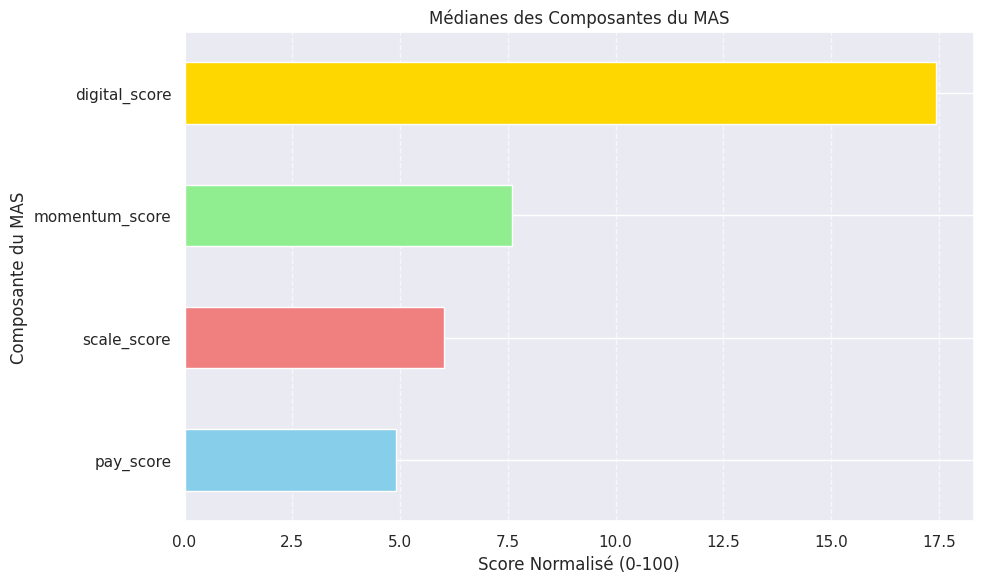

In [187]:
median_scores = df_mas[['scale_score', 'pay_score', 'momentum_score', 'digital_score']].median()

print("Médianes des composantes du MAS (sur une échelle de 0 à 100) :\n")
print(median_scores.sort_values(ascending=False))

plt.figure(figsize=(10, 6))
median_scores.sort_values(ascending=True).plot(kind='barh', color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Médianes des Composantes du MAS')
plt.xlabel('Score Normalisé (0-100)')
plt.ylabel('Composante du MAS')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Le `digital_score` a la médiane la plus élevée, ce qui suggère que, globalement, les pays d'Afrique subsaharienne ont une capacité numérique (utilisation d'Internet) relativement bonne comparée aux autres critères, ou du moins une distribution de scores plus centrée sur le haut de l'échelle.

 Le `pay_score` présente une médiane notablement plus basse, indiquant que la capacité de paiement des pays est, en moyenne, le facteur le plus faible parmi les composantes du MAS.

 Les `scale_score` et `momentum_score` se situent entre les deux, avec des médianes qui donnent une idée de la taille du marché éducatif et de sa dynamique de croissance, respectivement.

Cette comparaison aide à identifier les forces et faiblesses moyennes de la région en termes d'attractivité EdTech.

### Matrice de Corrélation des Composantes du MAS

### Histogrammes des Indicateurs Clés

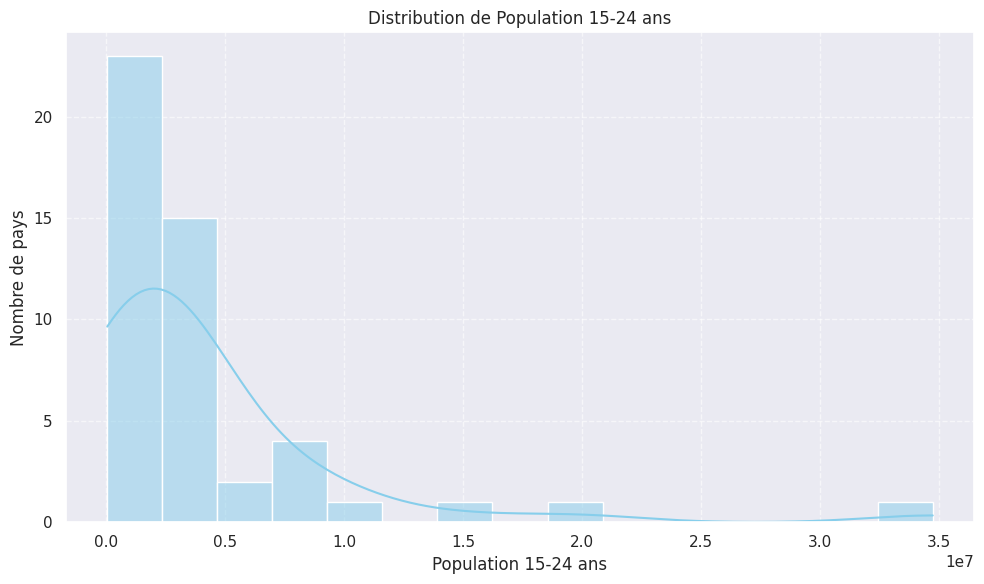

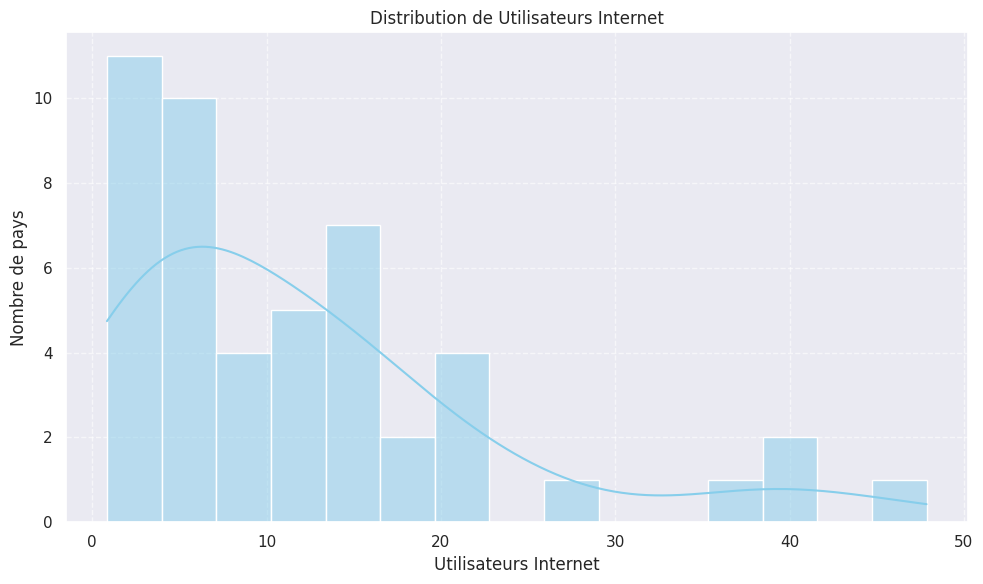

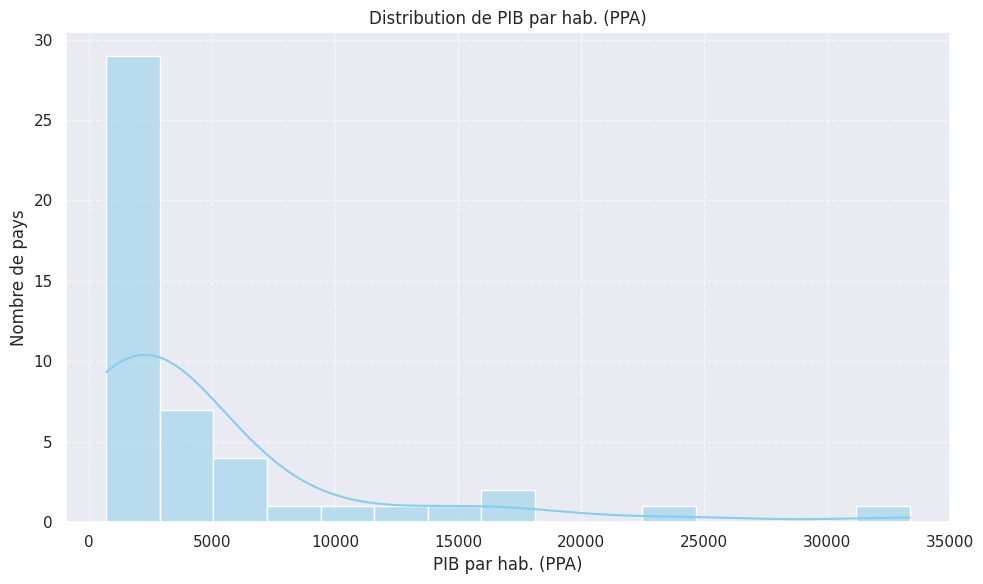

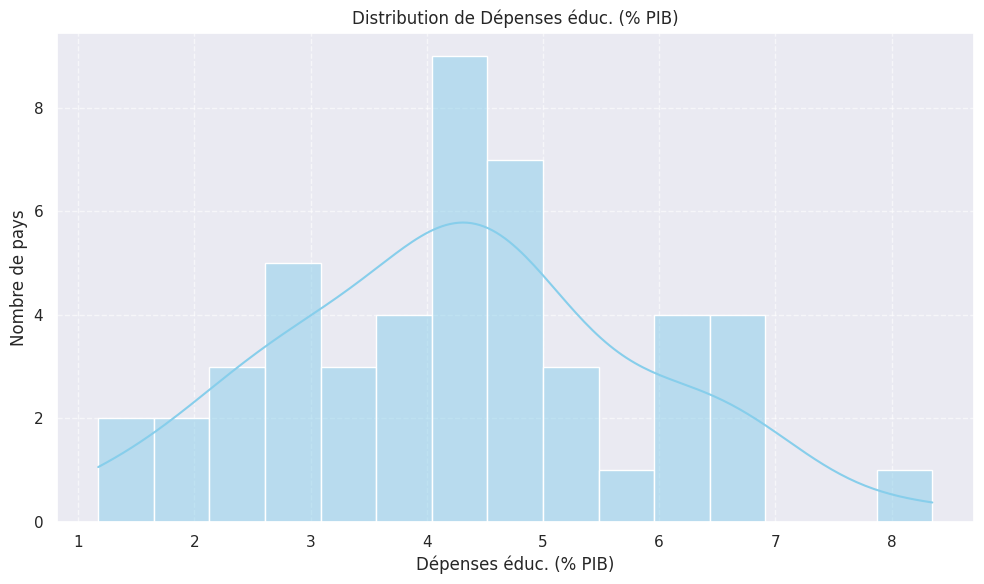

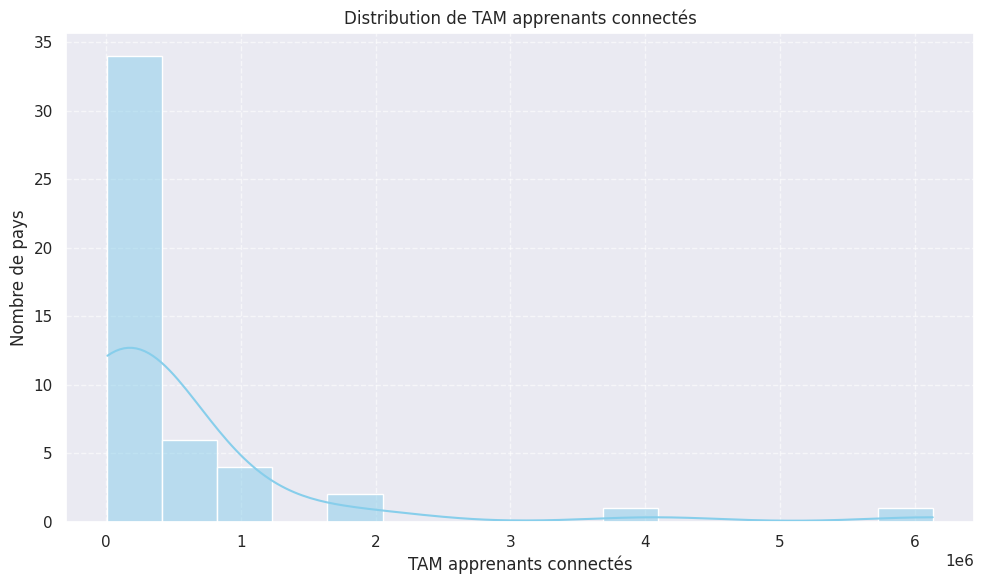

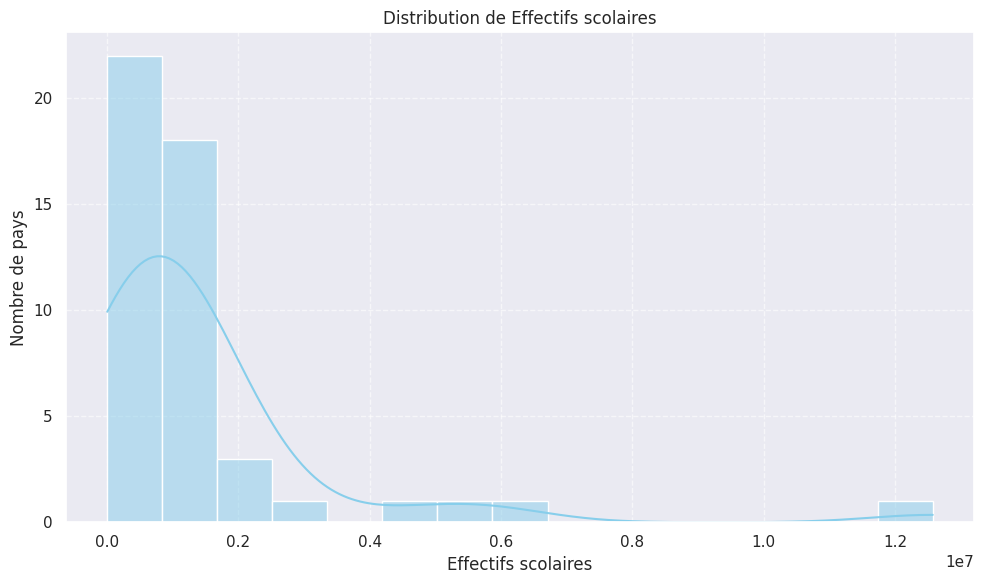

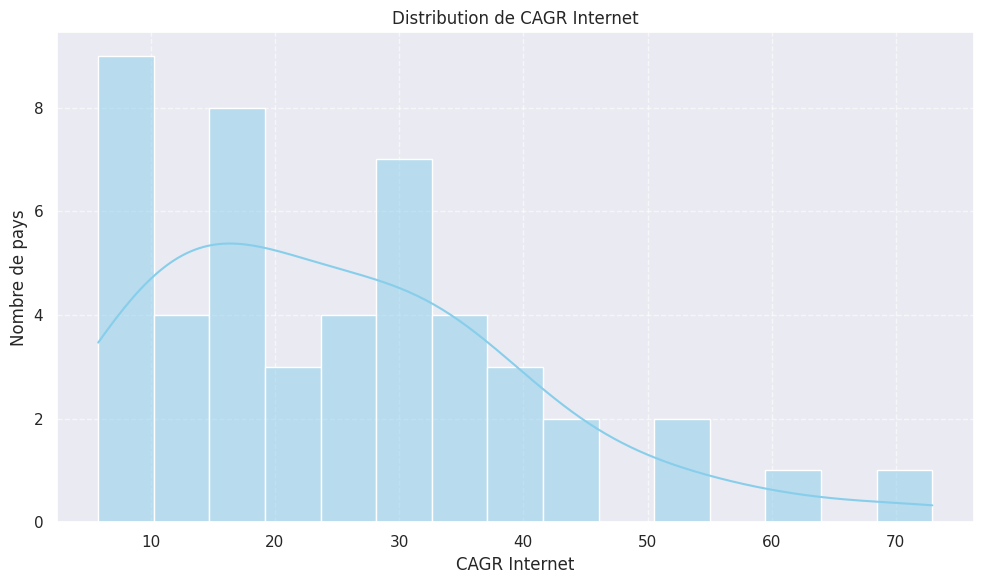

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Sélection des indicateurs clés pour les histogrammes
key_indicators_for_hist = [
    'Population 15-24 ans',
    'Utilisateurs Internet',
    'PIB par hab. (PPA)',
    'Dépenses éduc. (% PIB)',
    'TAM apprenants connectés',
    'Effectifs scolaires',
    'CAGR Internet'
]

# Générer un histogramme pour chaque indicateur clé
for indicator in key_indicators_for_hist:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_mas[indicator], bins=15, kde=True, color='skyblue')
    plt.title(f'Distribution de {indicator}')
    plt.xlabel(indicator)
    plt.ylabel('Nombre de pays')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

 histogrammes de la distribution des principaux indicateurs utilisés dans le calcul du MAS. Ils aident à comprendre la répartition des pays en termes de population jeune, d'utilisateurs Internet, de PIB par habitant, etc., et à identifier d'éventuels groupes ou anomalies.

### Boxplots des Composantes du MAS

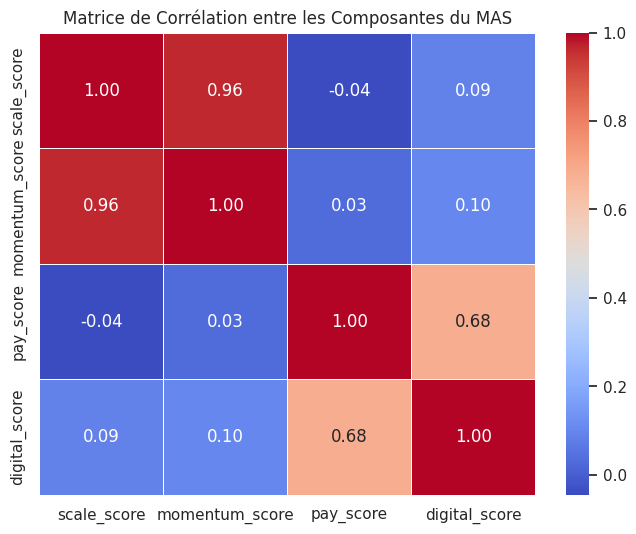

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les colonnes des composantes du MAS
mas_components = df_mas[['scale_score', 'momentum_score', 'pay_score', 'digital_score']]

# Calculer la matrice de corrélation
correlation_mas_components = mas_components.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_mas_components,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Matrice de Corrélation entre les Composantes du MAS')
plt.show()

Scale Score & Momentum Score (0.96)  
→ Corrélation très forte et positive : les pays avec un grand marché éducatif ont aussi une forte dynamique de croissance.
 Un marché large crée naturellement plus d’opportunités de développement.

Pay Score & Digital Score (0.68)  
→ Corrélation modérée à forte et positive : les pays avec une meilleure capacité de paiement sont souvent aussi plus avancés en préparation numérique.
Les ressources financières et les infrastructures numériques évoluent souvent ensemble.

Scale Score & Digital Score (0.09)  
→ Corrélation très faible : la taille du marché éducatif n’est pas liée au niveau de digitalisation. Un grand marché ne signifie pas forcément une forte adoption numérique.

Momentum Score & Digital Score (0.10)  
→ Corrélation faible : la dynamique de croissance du marché éducatif n’est pas directement associée à la préparation numérique.
La croissance peut exister même sans forte digitalisation.

Pay Score & Scale Score (-0.04)  
→ Corrélation quasi nulle ou légèrement négative : les pays avec une forte capacité de paiement ne sont pas forcément ceux avec les plus grands marchés éducatifs.
Volume et richesse ne vont pas toujours de pair.

### Les 4 Piliers du MAS pour les Top 5 Pays

In [192]:
sns.set_theme()
top5_countries_codes = df_ranking.head(5)['Country Code'].tolist()

df_top5_pillars = df_mas[df_mas['Country Code'].isin(top5_countries_codes)][
    ['Country Code', 'Country Name', 'scale_score', 'momentum_score', 'pay_score', 'digital_score']
].copy()

df_top5_pillars_long = df_top5_pillars.melt(
    id_vars=['Country Code', 'Country Name'],
    value_vars=['scale_score', 'momentum_score', 'pay_score', 'digital_score'],
    var_name='Pilier du MAS',
    value_name='Score Normalisé'
)



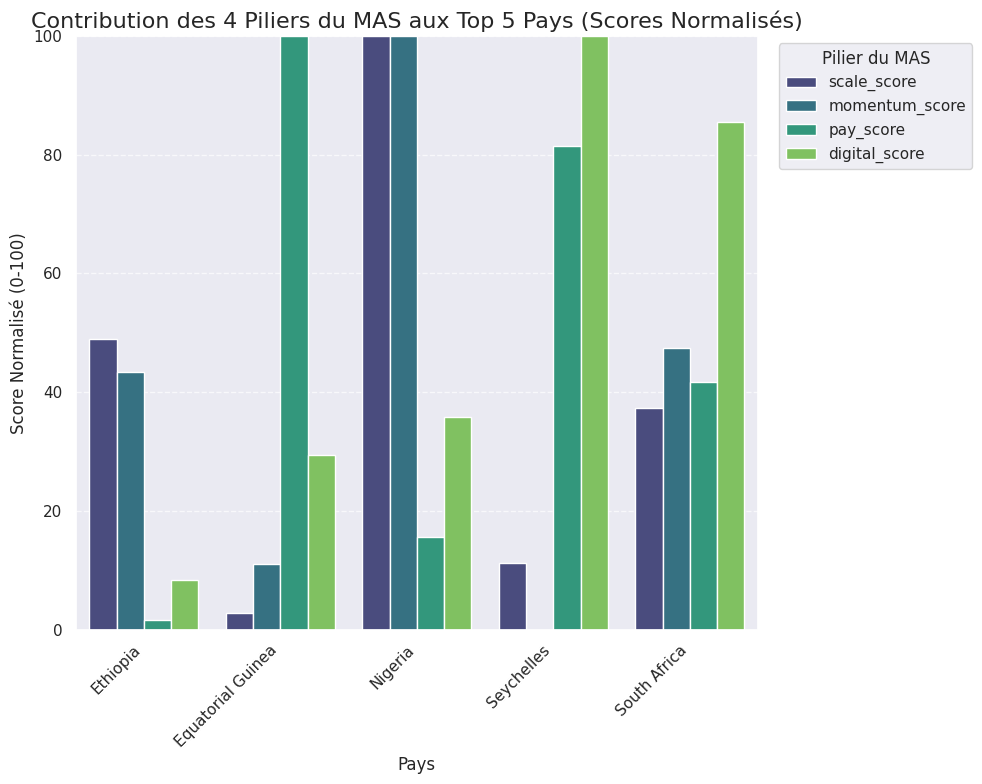

In [214]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=df_top5_pillars_long,
    x='Country Name',
    y='Score Normalisé',
    hue='Pilier du MAS',
    palette='viridis'
)

plt.title('Contribution des 4 Piliers du MAS aux Top 5 Pays (Scores Normalisés)', fontsize=16)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Score Normalisé (0-100)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend(title='Pilier du MAS', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Interprétation de la Matrice de Corrélation des Composantes du MAS

Scale Score & Momentum Score (0.96)  
→ Corrélation très forte et positive : les pays avec un grand marché éducatif ont aussi une forte dynamique de croissance.
 Un marché large crée naturellement plus d’opportunités de développement.

Pay Score & Digital Score (0.68)  
→ Corrélation modérée à forte et positive : les pays avec une meilleure capacité de paiement sont souvent aussi plus avancés en préparation numérique.
Les ressources financières et les infrastructures numériques évoluent souvent ensemble.

Scale Score & Digital Score (0.09)  
→ Corrélation très faible : la taille du marché éducatif n’est pas liée au niveau de digitalisation. Un grand marché ne signifie pas forcément une forte adoption numérique.

Momentum Score & Digital Score (0.10)  
→ Corrélation faible : la dynamique de croissance du marché éducatif n’est pas directement associée à la préparation numérique.
La croissance peut exister même sans forte digitalisation.

Pay Score & Scale Score (-0.04)  
→ Corrélation quasi nulle ou légèrement négative : les pays avec une forte capacité de paiement ne sont pas forcément ceux avec les plus grands marchés éducatifs.
Volume et richesse ne vont pas toujours de pair.

In [202]:

sub_region_map = {}
# Afrique de l’Ouest
for code in ["BEN", "BFA", "CPV", "CIV", "GMB", "GHA", "GIN", "GNB", "LBR", "MLI", "NER", "NGA", "SEN", "SLE", "TGO"]:
    sub_region_map[code] = "Afrique de l'Ouest"
# Afrique centrale
for code in ["AGO", "CMR", "CAF", "TCD", "COG", "COD", "GNQ", "GAB", "STP"]:
    sub_region_map[code] = "Afrique centrale"
# Afrique de l’Est
for code in ["BDI", "COM", "DJI", "ERI", "ETH", "KEN", "MDG", "MWI", "MUS", "MOZ", "RWA", "SYC", "SOM", "SSD", "TZA", "UGA", "ZMB", "ZWE"]:
    sub_region_map[code] = "Afrique de l'Est"
# Afrique australe
for code in ["BWA", "LSO", "NAM", "ZAF", "SWZ"]:
    sub_region_map[code] = "Afrique australe"

df_mas['Sub-Region'] = df_mas['Country Code'].map(sub_region_map)

sub_region_counts = df_mas['Sub-Region'].value_counts()



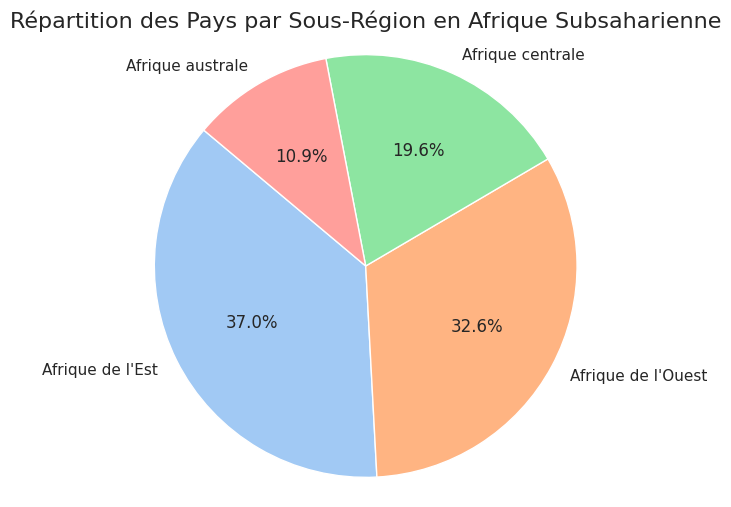

In [205]:

plt.figure(figsize=(6, 6))
plt.pie(sub_region_counts, labels=sub_region_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Répartition des Pays par Sous-Région en Afrique Subsaharienne', fontsize=16)
plt.axis('equal')
plt.show()

### Interprétation du Diagramme Circulaire des Sous-Régions

Ce diagramme circulaire illustre la proportion de pays dans chaque sous-région de l'Afrique subsaharienne. Il fournit un aperçu de la distribution géographique des pays inclus dans l'analyse, ce qui peut influencer la stratégie d'expansion en fonction de la concentration du marché.

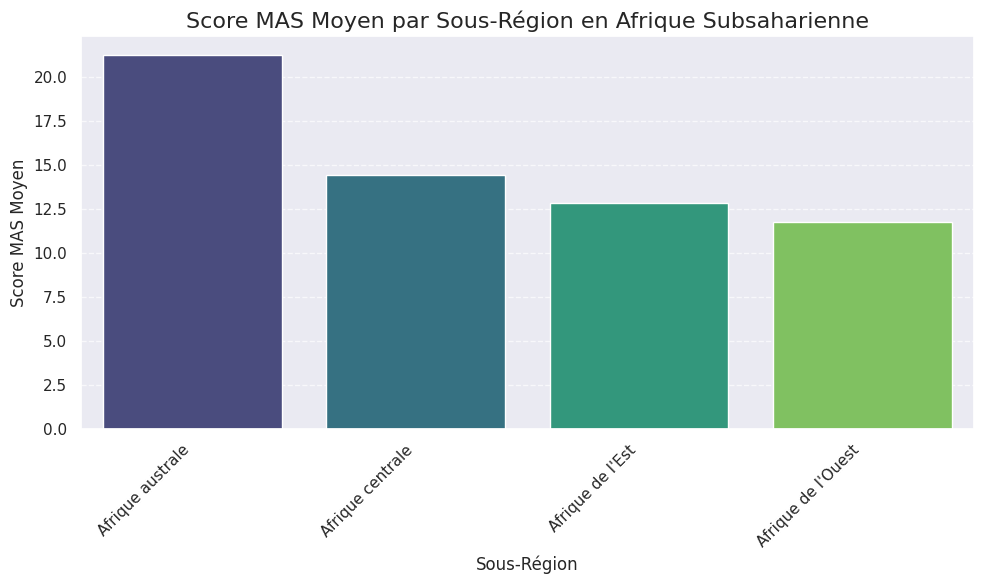

In [206]:
mas_by_sub_region = df_mas.groupby('Sub-Region')['MAS_final'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Region', y='MAS_final', data=mas_by_sub_region, palette='viridis')
plt.title('Score MAS Moyen par Sous-Région en Afrique Subsaharienne', fontsize=16)
plt.xlabel('Sous-Région', fontsize=12)
plt.ylabel('Score MAS Moyen', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Ce graphique à barres présente le score MAS moyen pour chaque sous-région d'Afrique subsaharienne. Il permet d'identifier quelles régions sont, en moyenne, les plus attractives pour les investissements EdTech, offrant une perspective géographique sur le potentiel du marché. Les barres plus hautes indiquent une attractivité moyenne plus élevée.

# 6. Recommandations

### Proposition de Pays Prioritaires pour Akowé

En se basant sur le Market Attractiveness Score (MAS_final), qui agrège et pondère les indicateurs de taille de marché, de dynamique de croissance, de capacité de paiement et de préparation numérique, nous proposons la liste suivante de pays prioritaires pour l'expansion d'Akowé en Afrique subsaharienne. Ces pays sont ceux qui présentent le score MAS_final le plus élevé, indiquant un potentiel de marché globalement favorable.

**Classement des 10 Pays Prioritaires (MAS_final) :**
1.  **NGA (Nigéria)**: 69.3
2.  **ZAF (Afrique du Sud)**: 48.2
3.  **SYC (Seychelles)**: 39.3
4.  **GNQ (Guinée équatoriale)**: 33.1
5.  **ETH (Éthiopie)**: 29.7
6.  **MUS (Maurice)**: 27.5
7.  **GAB (Gabon)**: 26.3
8.  **BWA (Botswana)**: 22.4
9.  **SDN (Soudan)**: 22.4
10. **COD (République Démocratique du Congo)**: 21.8

#### Justification des Choix (Top 5 Pays)

Examinons plus en détail les 5 premiers pays pour comprendre les forces de chaque marché, en nous appuyant sur les scores des piliers du MAS et les visualisations précédentes (notamment la heatmap des sous-scores et le graphique Population Jeune vs Connectivité Digitale):

1.  **NGA (Nigéria)**:
    *   **MAS_final**: 69.3 (Leader incontesté)
    *   **Points Forts**: Le Nigéria excelle massivement sur le **Scale Score** (taille du marché) et le **Momentum Score** (dynamique de croissance), bénéficiant de la plus grande population jeune de la région et d'une croissance éducative significative. Sa position élevée dans le classement s'explique par son immense bassin d'apprenants potentiels et une forte progression. Bien que son **Digital Readiness Score** soit moyen, l'ampleur de son marché en fait une cible prioritaire malgré les défis de connectivité à adresser.

2.  **ZAF (Afrique du Sud)**:
    *   **MAS_final**: 48.2
    *   **Points Forts**: L'Afrique du Sud se distingue par un bon **Pay Score** (capacité de paiement) et un excellent **Digital Readiness Score** (préparation numérique), indiquant une économie plus développée et une forte adoption technologique. Elle présente également un bon **Scale Score** et **Momentum Score**, bien que moins dominant que le Nigéria. C'est un marché mature avec des consommateurs à pouvoir d'achat et une infrastructure numérique solide.

3.  **SYC (Seychelles)**:
    *   **MAS_final**: 39.3
    *   **Points Forts**: Les Seychelles brillent par leurs scores très élevés en **Pay Score** (capacité de paiement) et **Digital Readiness Score** (notamment avec 100 en digital score normalisé). Malgré une taille de marché (`Scale Score`) naturellement plus faible en raison de sa petite population, ses indicateurs économiques robustes et sa connectivité avancée en font un marché très attractif pour des solutions EdTech de qualité supérieure ou des partenariats institutionnels.

4.  **GNQ (Guinée équatoriale)**:
    *   **MAS_final**: 33.1
    *   **Points Forts**: Ce pays présente un **Pay Score** particulièrement élevé (100 en score normalisé), reflet de son PIB par habitant élevé, ce qui indique une forte capacité de paiement. Son **Digital Readiness Score** est également solide. Comme les Seychelles, son **Scale Score** est plus modeste, mais le pouvoir d'achat compense ce volume, le rendant attractif pour des solutions de niche ou à forte valeur ajoutée.

5.  **ETH (Éthiopie)**:
    *   **MAS_final**: 29.7
    *   **Points Forts**: L'Éthiopie se classe très bien sur le **Scale Score** et le **Momentum Score**, grâce à une population jeune très importante et une forte dynamique de croissance éducative. Son **Digital Readiness Score** et **Pay Score** sont encore relativement faibles, mais le potentiel démographique massif et l'amélioration rapide des indicateurs en font un marché avec un énorme potentiel à long terme pour des solutions EdTech adaptées à des contextes de ressources limitées et de forte croissance.

**Synthèse des Recommandations :**

*   **Priorité 1 (Grand Volume & Dynamisme)**: **Nigéria et Éthiopie** pour leur immense potentiel en termes de nombre d'apprenants et de croissance. Nécessitent des stratégies d'adaptation aux infrastructures numériques et à la capacité de paiement.
*   **Priorité 2 (Richesse & Connectivité)**: **Afrique du Sud, Seychelles et Guinée équatoriale** pour leur forte capacité de paiement et leur préparation numérique. Idéaux pour des solutions premium, des partenariats B2B ou des modèles d'abonnement.
*   **Considérations Additionnelles**: Les autres pays du Top 10 comme Maurice (MUS), Gabon (GAB), Botswana (BWA) et Soudan (SDN) présentent également des atouts significatifs, souvent un bon équilibre entre capacité de paiement et préparation numérique pour des marchés de taille moyenne. La RDC (COD) représente un marché au potentiel démographique immense (comme le Nigéria) mais avec des défis plus importants en termes de développement économique et numérique à ce jour.

## Limites de l'Analyse

L'analyse du potentiel EdTech en Afrique subsaharienne est soumise à plusieurs limites :

1.  **Qualité et Complétude des Données** : De nombreux indicateurs présentent des taux de remplissage inférieurs à 100% (ex: taux d'achèvement secondaire à ~60%, dépenses éducatives à ~55%), ce qui peut introduire des biais et réduire la robustesse du MAS, même avec un ajustement pour la complétude.

2.  **Méthodes d'Imputation** : L'utilisation de l'interpolation linéaire (pour les tendances chronologiques) et de l'imputation par la moyenne globale (pour les valeurs restantes) repose sur des hypothèses qui peuvent uniformiser les données ou ne pas refléter fidèlement la réalité, surtout pour les pays avec beaucoup de données manquantes.

3.  **Adéquation des Indicateurs** : Les indicateurs disponibles se concentrent majoritairement sur l'éducation formelle et ne couvrent pas toujours des aspects cruciaux pour l'EdTech comme l'accès aux appareils numériques, la qualité de l'éducation, la motivation des apprenants ou la fiabilité des infrastructures électriques. Les données agrégées au niveau national masquent également les disparités régionales et socio-économiques.

En conclusion, les scores MAS et les recommandations reflètent le potentiel basé sur les données disponibles, mais une validation qualitative sur le terrain est essentielle pour une compréhension plus nuancée et pour adapter les solutions d'Akowé aux réalités locales.